In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.cosmology import Planck18 as cosmo
from scipy import integrate
from scipy.integrate import quad
from scipy.special import gamma
from scipy.interpolate import interp1d
import astropy.units as u

%config InlineBackend.figure_format ='retina'
plt.rcParams["text.usetex"] = True

# Merger Rates

C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\1711249849.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)


Total de eventos para HS nod SN high accr (B+20): 9406.90318209738


C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\1711249849.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)


Total de eventos para HS nod noSN (B+20): 39363.80689342792


C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\1711249849.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)


Total de eventos para HS nod SN (B+20): 36789.693230919744


C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\1711249849.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)


Total de eventos para Pop III (K+16): 1410.0304047830805


C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\1711249849.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)


Total de eventos para Q3 nod (K+16): 657.2212240367768


C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\1711249849.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)


Total de eventos para Q3 d (K+16): 73.52306287108473


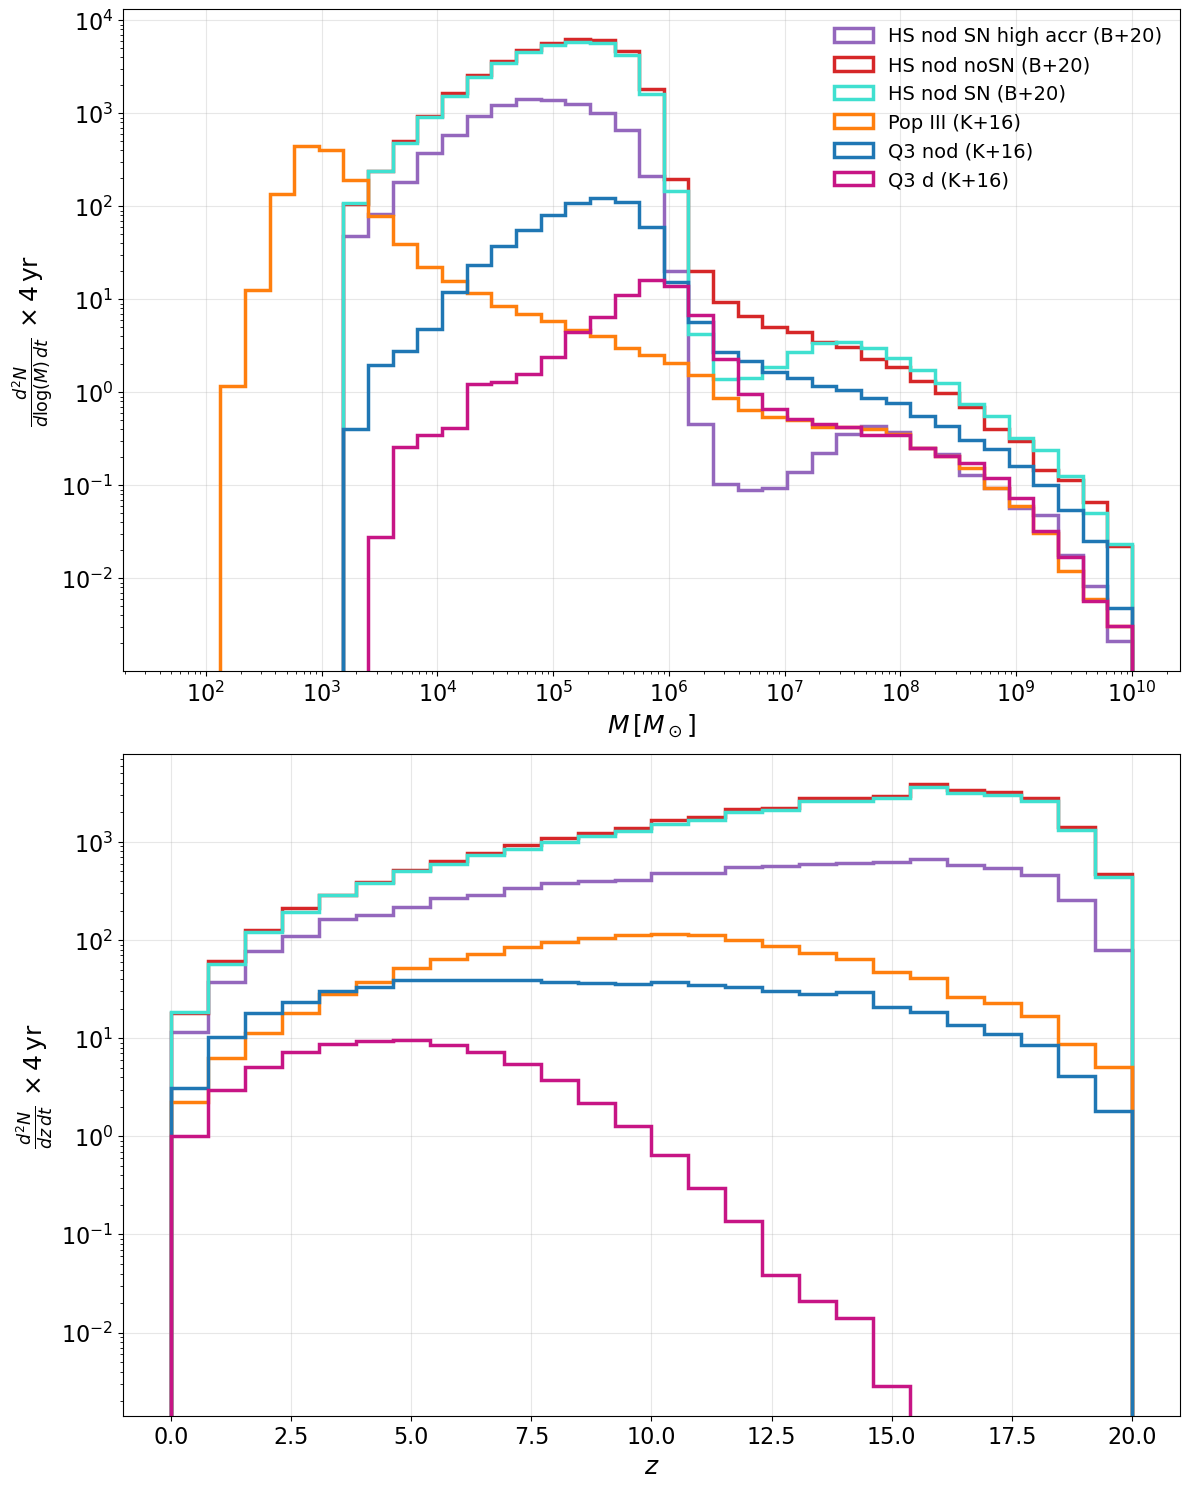

In [3]:
# Merger rates para todas las simulaciones

file_paths = [
    ("HS-nod-SN-high-accr.dat.bz2", "HS nod SN high accr (B+20)", "tab:purple"),
  #  ("HS-nod_B12_extrapolated.dat.bz2", "HS nod (B12)", "tab:green"), 
  #  ("LS-nod_B12_extrapolated.dat.bz2", "LS nod (B12)", "tab:olive"),
    ("HSnodB20noSN_extrapolated.dat.bz2", "HS nod noSN (B+20)", "firebrick"), 
    ("HSnodB20SN_extrapolated.dat.bz2", "HS nod SN (B+20)", "turquoise"),  
 #   ("LSnodB20noSN_extrapolated.dat.bz2", "LS nod noSN (B+20)", "deepskyblue"),
  #  ("LSnodB20SN_extrapolated.dat.bz2", "LS nod SN (B+20)", "tab:brown"),
    ("popIII/popIII_K16_extrapolated.dat.bz2", "Pop III (K+16)", "tab:orange"),
    ("q3nod/q3nod_K16_extrapolated.dat.bz2", "Q3 nod (K+16)", "tab:blue"),
    ("q3d/q3d_K16_extrapolated.dat.bz2", "Q3 d (K+16)", "mediumvioletred")
]

column_names = [
    "z_merger", "m1", "m2", "a1", "a2", "alpha", "beta", "gamma", "psi",
    "afin", "mfin", "vkick", "vesc_halo", "vesc_bar", "Mcluster", "Mdisk_stars",
    "Mdisk_gas", "Mbulge_stars", "Mbulge_gas", "MNSC", "Mreservoir",
    "Mhalo_final", "halo_density"
]

c = 9.72e-15  # Velocidad de la luz en Mpc/s

z_bins = np.linspace(0, 20, 27)
mass_bins = np.logspace(1.7, 10, 40)

fig, axs = plt.subplots(2, 1, figsize=(12,15), sharex=False)

for path, label, color in file_paths:
    data = pd.read_csv(path, delim_whitespace=True, names=column_names)
    
    data["DL"] = cosmo.luminosity_distance(data["z_merger"]).value
    data["d2N_dzdt"] = (4 * np.pi * c * data["halo_density"] * data["DL"]**2 / ((1 + data["z_merger"])**2))
    
    data["total_mass"] = data["m1"] + data["m2"]
    data["z_merger_noisy"] = data["z_merger"] + np.random.normal(0, 0.55, len(data))
    
    mass_hist, mass_edges = np.histogram(data["total_mass"], bins=mass_bins, weights=data["d2N_dzdt"])
    z_hist, z_edges = np.histogram(data["z_merger_noisy"], bins=z_bins, weights=data["d2N_dzdt"])
    print(f"Total de eventos para {label}: {np.sum(mass_hist)*3600 * 24 * 365 * 4}")
    
    axs[0].hist(
        0.5 * (mass_edges[:-1] + mass_edges[1:]),
        bins=mass_bins,
        weights=mass_hist * 3600 * 24 * 365 * 4,
        histtype="step",
        color=color,
        label=label,
        linewidth=2.5
    )

    axs[1].hist(
        0.5 * (z_edges[:-1] + z_edges[1:]),
        bins=z_bins,
        weights=z_hist * 3600 * 24 * 365 * 4,
        histtype="step",
        color=color,
        label=label,
        linewidth=2.5
    )

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel(r"$M \, [M_\odot]$", fontsize = 18)
axs[0].set_ylabel(r"$\frac{d^2N}{d\log(M) \, dt} \, \times 4 \, \text{yr}$", fontsize = 18)
axs[0].grid(alpha=0.3)
axs[0].tick_params(labelsize=16)
#axs[0].set_ylim(4e-2, 1300)
#axs[0].set_xlim(50, 1e10)
axs[0].legend(frameon=False, fontsize = 14)

axs[1].set_yscale("log")
axs[1].set_xlabel(r"$z$", fontsize = 18)
axs[1].set_ylabel(r"$\frac{d^2N}{dz \, dt} \, \times 4 \, \text{yr}$", fontsize = 18)
axs[1].grid(alpha=0.3)
axs[1].set_xticks(np.arange(0, 21, 2.5))
axs[1].tick_params(labelsize=16)
#axs[1].set_ylim(0.02, 300)
#axs[1].set_xlim(-1, 21)


plt.tight_layout()
plt.show()

C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\1898542566.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)
C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\1898542566.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)
C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\1898542566.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)
C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\1898542566.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed i

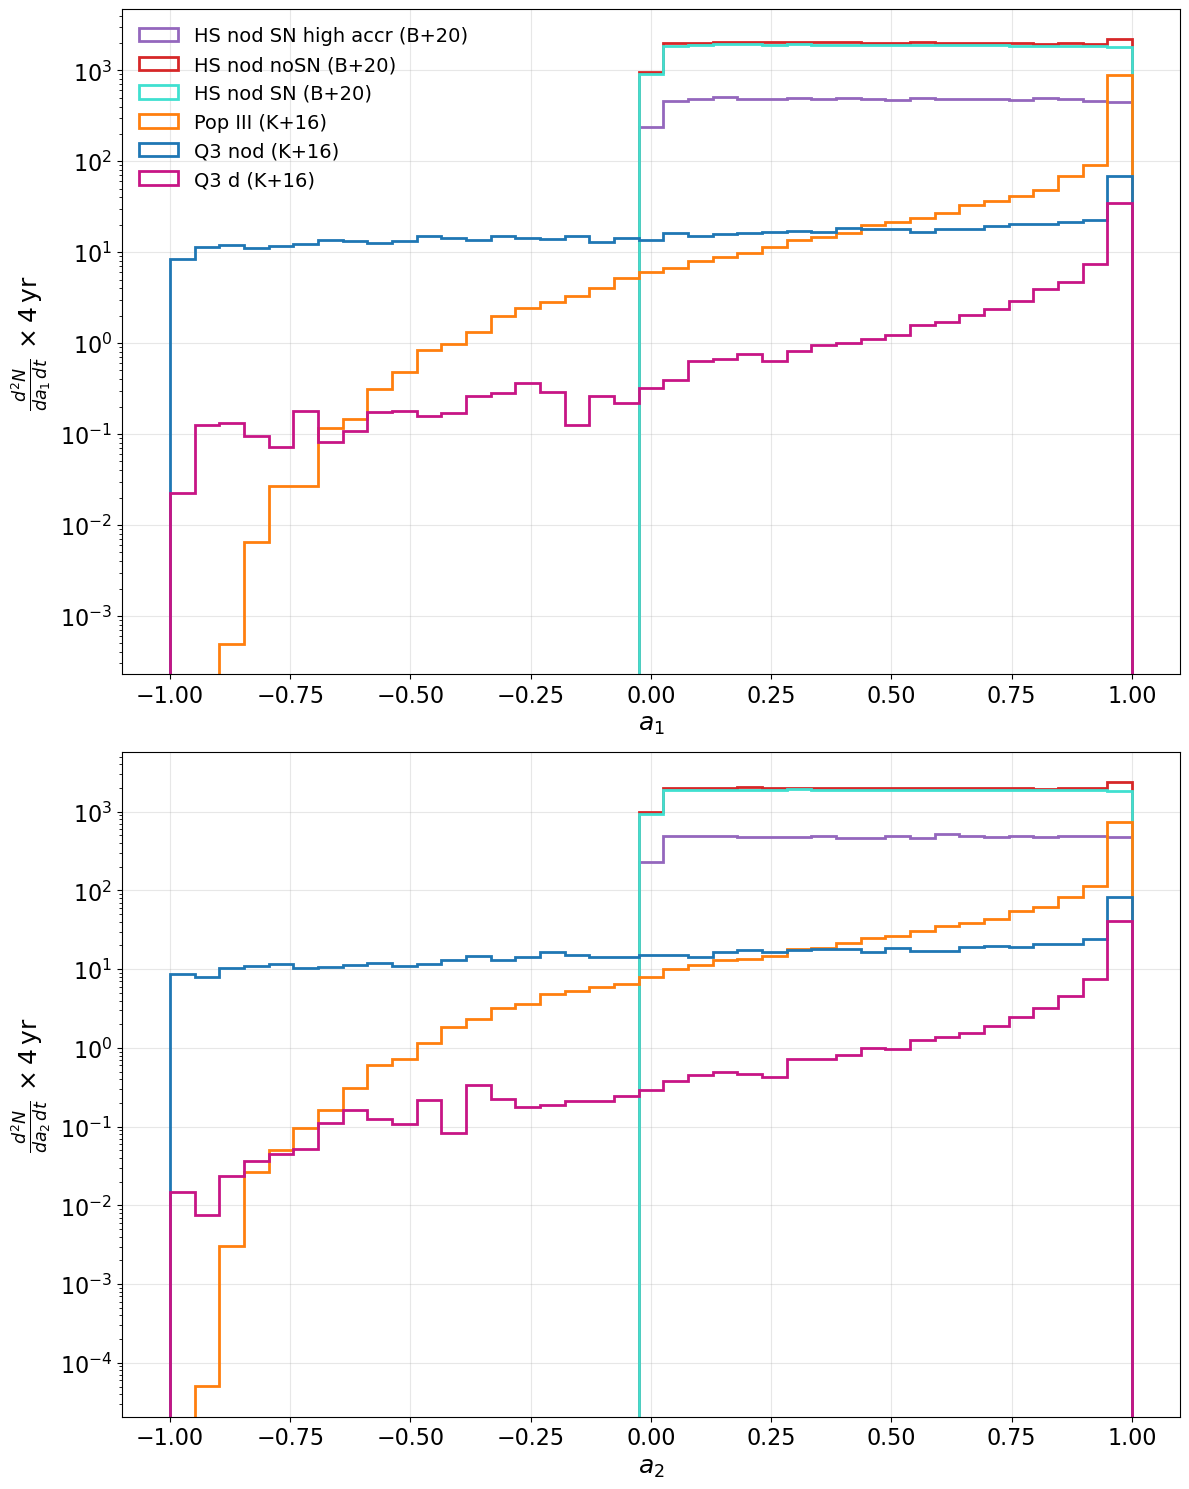

In [6]:
# Mismo merger rate que el anterior pero ahora para a1 y a2

a_bins = np.linspace(-1, 1, 40)

fig, axs = plt.subplots(2, 1, figsize=(12,15), sharex=False)

for path, label, color in file_paths:
    data = pd.read_csv(path, delim_whitespace=True, names=column_names)
    data["DL"] = cosmo.luminosity_distance(data["z_merger"]).value
    data["d2N_dzdt"] = ( 4 * np.pi * c * data["halo_density"] * data["DL"]**2 / ((1 + data["z_merger"])**2)    )    
    a1_hist, a1_edges = np.histogram(data["a1"], bins=a_bins, weights=data["d2N_dzdt"])
    a2_hist, a2_edges = np.histogram(data["a2"], bins=a_bins, weights=data["d2N_dzdt"])


    axs[0].hist(
        0.5 * (a1_edges[:-1] + a1_edges[1:]),
        bins=a_bins,
        weights=a1_hist * 3600 * 24 * 365 * 4,
        histtype="step",
        color=color,
        label=label,
        linewidth=2
    )

    axs[1].hist(
        0.5 * (a2_edges[:-1] + a2_edges[1:]),
        bins=a_bins,
        weights=a2_hist * 3600 * 24 * 365 * 4,
        histtype="step",
        color=color,
        label=label,
        linewidth=2
    )
    

# ------ Graficar ------
#axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel(r"$a_1$", fontsize = 18)
axs[0].set_ylabel(r"$\frac{d^2N}{da_1 \, dt} \, \times 4 \, \text{yr}$", fontsize = 18)
axs[0].grid(alpha=0.3)
axs[0].tick_params(labelsize=16)
#axs[0].set_ylim(4e-2, 1300)
axs[0].set_xlim(-1.1, 1.1)
axs[0].legend(frameon=False, fontsize = 14)

axs[1].set_yscale("log")
axs[1].set_xlabel(r"$a_2$", fontsize = 18)
axs[1].set_ylabel(r"$\frac{d^2N}{da_2 \, dt} \, \times 4 \, \text{yr}$", fontsize = 18)
axs[1].grid(alpha=0.3)
#axs[1].set_ylim(0.02, 300)
axs[1].tick_params(labelsize=16)
axs[1].set_xlim(-1.1,1.1)

plt.tight_layout()
plt.show()

## esto para hacer que los spin parameters vayan de -1 a 1

In [31]:
import bz2

input_file = "HSnodB20SN_extrapolated.dat.bz2"
output_file = "HSnodB20SN_extrapolated_signed.dat.bz2"

columns = ["z", "m1", "m2", "a1", "a2","alpha", "beta", "gamma", "psi","afin", "mfin", "vkick", "vesc_halo", "vesc_bar","Mcluster", "Mdisk_stars", "Mdisk_gas", "Mbulge_stars","Mbulge_gas", "MNSC", "Mreservoir","Mhalo_final","WPS"]

with bz2.open(input_file, "rt") as f:
    df = pd.read_csv(f, delim_whitespace=True, names=columns)

df["a1_signed"] = df["a1"] * np.sign(np.cos(df["beta"]))
df["a2_signed"] = df["a2"] * np.sign(np.cos(df["gamma"]))

df["a1"] = df["a1_signed"]
df["a2"] = df["a2_signed"]
df.drop(columns=["a1_signed", "a2_signed"], inplace=True)

with bz2.open(output_file, "wt") as f:
    df.to_csv(f, sep="\t", index=False, header=False)

output_file


C:\Users\juanf\AppData\Local\Temp\ipykernel_30272\2487998951.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, names=columns)


'HSnodB20SN_extrapolated_signed.dat.bz2'

In [ ]:
columns = ["z", "m1", "m2", "a1", "a2","alpha", "beta", "gamma", "psi","afin", "mfin", "vkick", "vesc_halo", "vesc_bar","Mcluster", "Mdisk_stars", "Mdisk_gas", "Mbulge_stars","Mbulge_gas", "MNSC", "Mreservoir","Mhalo_final","WPS"]

df = pd.read_csv('HSnodB20SN_extrapolated_signed.dat.bz2', sep=',', names=columns)
df

/tmp/ipykernel_10078/1398155609.py:38: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)


TypeError: can only concatenate str (not "float") to str

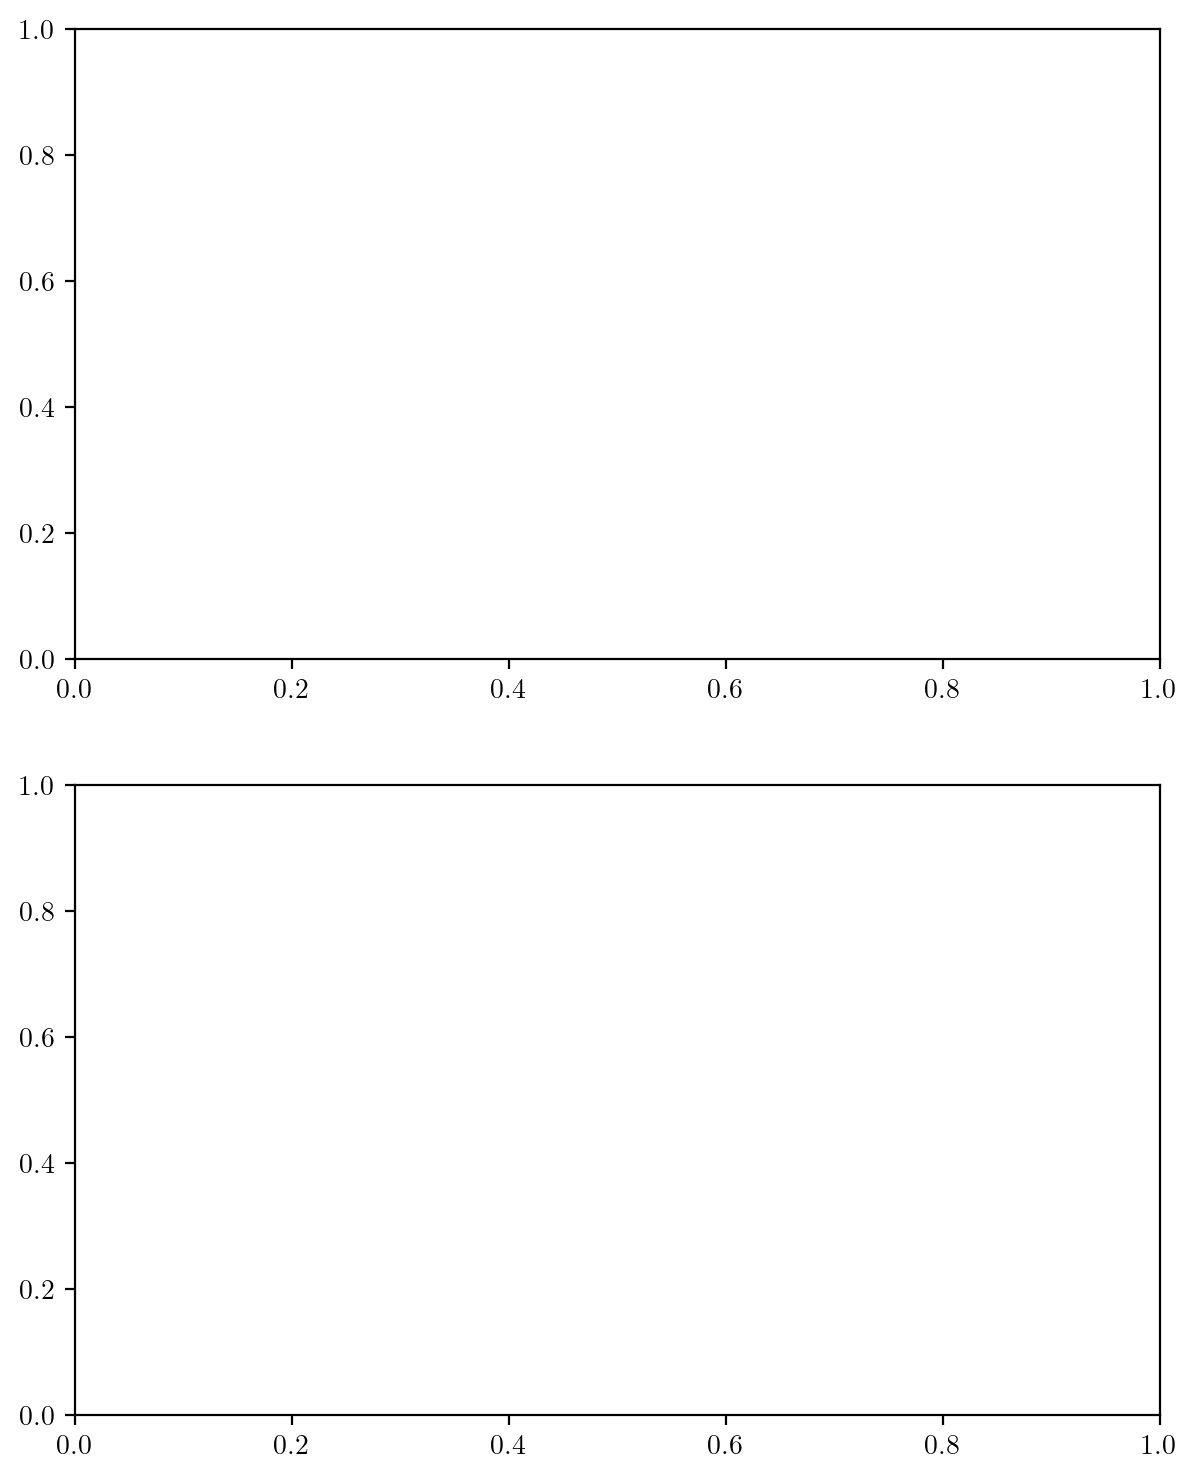

In [128]:
# Merger rates para las 6 simulaciones al mismo tiempo

file_paths = [
    ("HS-nod-SN-high-accr_signed.dat.bz2", "HS nod SN high accr (B+20)", "tab:purple"),
  #  ("HS-nod_B12_extrapolated.dat.bz2", "HS nod (B12)", "tab:green"), 
  #  ("LS-nod_B12_extrapolated.dat.bz2", "LS nod (B12)", "tab:olive"),
    ("HSnodB20noSN_extrapolated_signed.dat.bz2", "HS nod noSN (B+20)", "tab:red"), 
    ("HSnodB20SN_extrapolated_signed.dat.bz2", "HS nod SN (B+20)", "tab:brown"),  
 #   ("LSnodB20noSN_extrapolated.dat.bz2", "LS nod noSN (B+20)", "deepskyblue"),
  #  ("LSnodB20SN_extrapolated.dat.bz2", "LS nod SN (B+20)", "turquoise"),
    ("popIII/popIII_K16_extrapolated.dat.bz2", "Pop III d (K+16)", "tab:orange"),
    ("q3nod/q3nod_K16_extrapolated.dat.bz2", "Q3 nod (K+16)", "tab:blue"),
    ("q3d/q3d_K16_extrapolated.dat.bz2", "Q3 d (K+16)", "tab:green")
]

column_names = [
    "z_merger", "m1", "m2", "a1", "a2", "alpha", "beta", "gamma", "psi",
    "afin", "mfin", "vkick", "vesc_halo", "vesc_bar", "Mcluster", "Mdisk_stars",
    "Mdisk_gas", "Mbulge_stars", "Mbulge_gas", "MNSC", "Mreservoir",
    "Mhalo_final", "halo_density"
]

c = 9.72e-15  # Velocidad de la luz en Mpc/s

z_bins = np.linspace(0, 20, 36)
mass_bins = np.logspace(1.7, 10, 45)

fig, axs = plt.subplots(2, 1, figsize=(7,9), sharex=False)

for path, label, color in file_paths:
    data = pd.read_csv(path, delim_whitespace=True, names=column_names)
    
    data["DL"] = cosmo.luminosity_distance(data["z_merger"]).value
    data["d2N_dzdt"] = (4 * np.pi * c * data["halo_density"] * data["DL"]**2 / ((1 + data["z_merger"])**2))
    
    data["total_mass"] = data["m1"] + data["m2"]
    data["z_merger_noisy"] = data["z_merger"] + np.random.normal(0, 0.55, len(data))
    
    mass_hist, mass_edges = np.histogram(data["total_mass"], bins=mass_bins, weights=data["d2N_dzdt"])
    z_hist, z_edges = np.histogram(data["z_merger_noisy"], bins=z_bins, weights=data["d2N_dzdt"])
    print(f"Total de eventos para {label}: {np.sum(mass_hist)*3600 * 24 * 365 * 4}")
    
    axs[0].hist(
        0.5 * (mass_edges[:-1] + mass_edges[1:]),
        bins=mass_bins,
        weights=mass_hist * 3600 * 24 * 365 * 4,
        histtype="step",
        color=color,
        label=label,
        linewidth=2.5
    )

    axs[1].hist(
        0.5 * (z_edges[:-1] + z_edges[1:]),
        bins=z_bins,
        weights=z_hist * 3600 * 24 * 365 * 4,
        histtype="step",
        color=color,
        label=label,
        linewidth=2.5
    )

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel(r"$\mathrm{M} \, [\mathrm{M}_\odot]$", fontsize = 18)
axs[0].set_ylabel(r"$\frac{d^2N}{d\log(M) \, dt} \, \times 4 \, \mathrm{yr}$", fontsize = 18)
axs[0].grid(alpha=0.3)
axs[0].tick_params(labelsize=16)
axs[0].set_ylim(2e-2, 2e4)
axs[0].set_xlim(60, 1e11)
axs[0].legend(frameon=False, fontsize = 12.5, loc='upper right')

axs[1].set_yscale("log")
axs[1].set_xlabel(r"$z$", fontsize = 18)
axs[1].set_ylabel(r"$\frac{d^2N}{dz \, dt} \, \times 4 \, \mathrm{yr}$", fontsize = 18)
axs[1].grid(alpha=0.3)
axs[1].set_xticks(np.arange(0, 21, 2.5))
axs[1].tick_params(labelsize=16)
axs[1].set_ylim(2e-2, 6.5e3)
#axs[1].set_xlim(-1, 21)


plt.tight_layout()
#plt.savefig('MergerRatesMz.pdf')
plt.show()


/tmp/ipykernel_4891/104748106.py:30: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, names=column_names)


TypeError: '<' not supported between instances of 'float' and 'str'

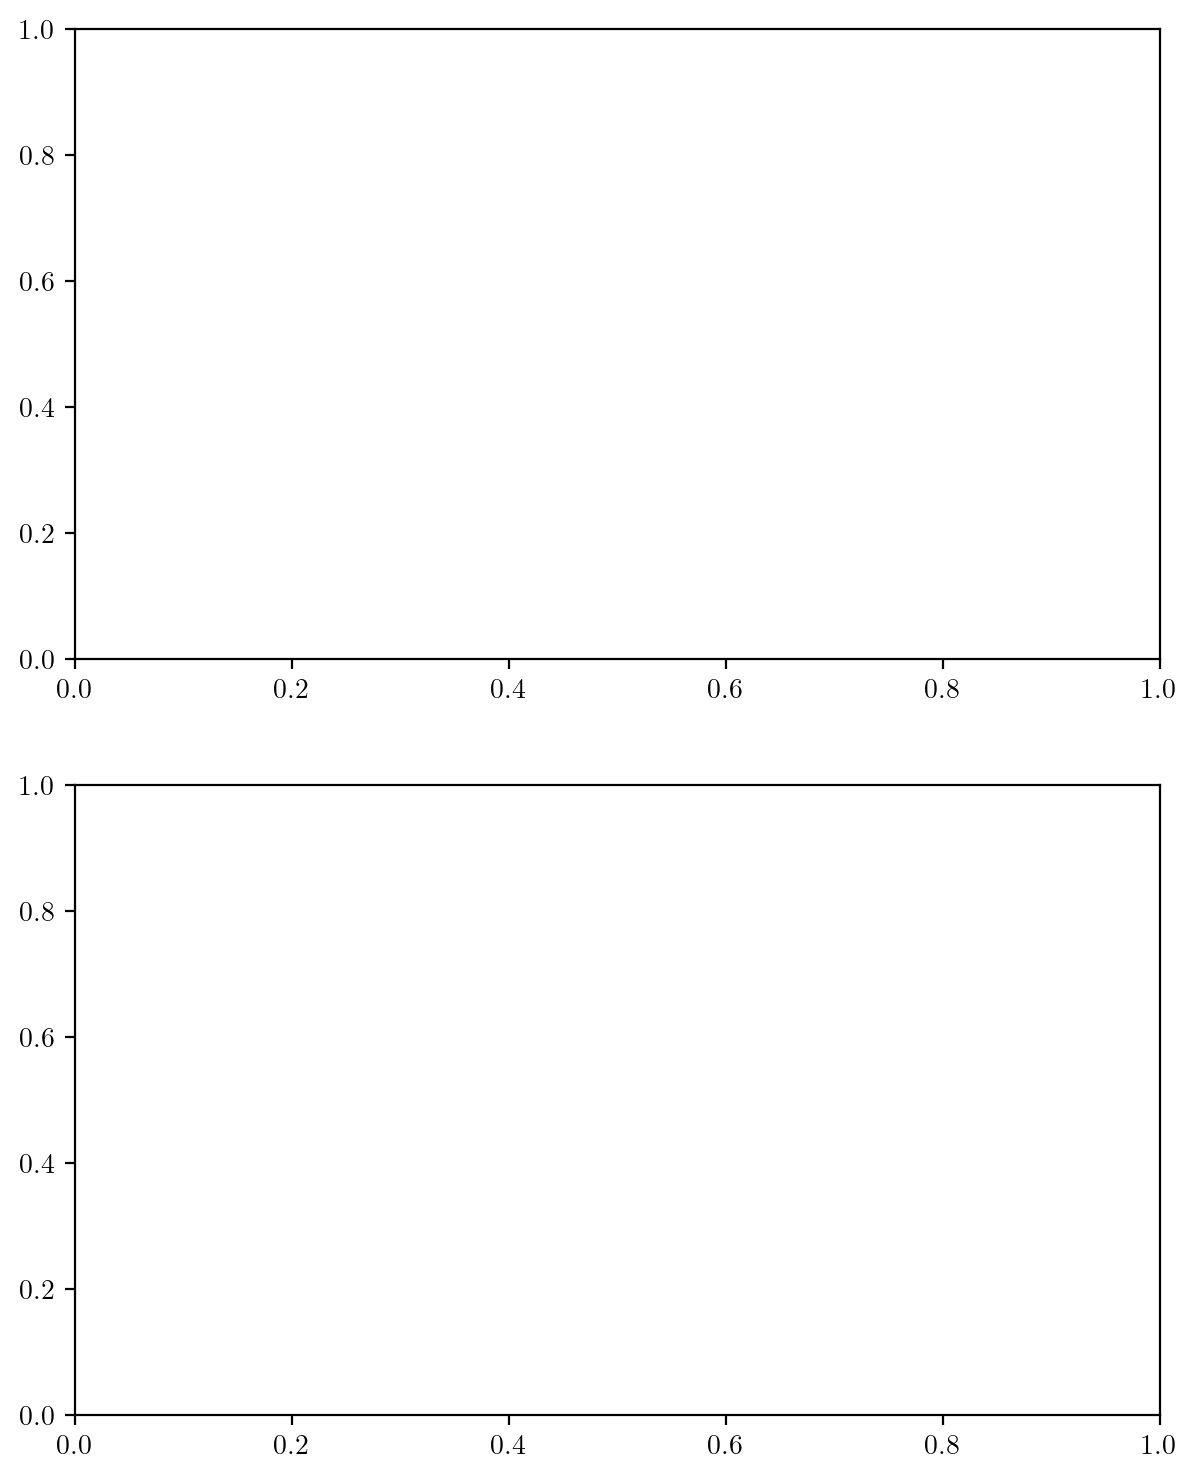

In [5]:
# Merger rates para las 6 simulaciones al mismo tiempo (ahora no el espacio log)

file_paths = [
    ("HS-nod-SN-high-accr_signed.dat.bz2", "HS nod SN high accr (B+20)", "tab:purple"),
  #  ("HS-nod_B12_extrapolated.dat.bz2", "HS nod (B12)", "tab:green"), 
  #  ("LS-nod_B12_extrapolated.dat.bz2", "LS nod (B12)", "tab:olive"),
    ("HSnodB20noSN_extrapolated_signed.dat.bz2", "HS nod noSN (B+20)", "tab:red"), 
    ("HSnodB20SN_extrapolated_signed.dat.bz2", "HS nod SN (B+20)", "tab:brown"),  
 #   ("LSnodB20noSN_extrapolated.dat.bz2", "LS nod noSN (B+20)", "deepskyblue"),
  #  ("LSnodB20SN_extrapolated.dat.bz2", "LS nod SN (B+20)", "turquoise"),
    ("popIII/popIII_K16_extrapolated.dat.bz2", "Pop III d (K+16)", "tab:orange"),
    ("q3nod/q3nod_K16_extrapolated.dat.bz2", "Q3 nod (K+16)", "tab:blue"),
    ("q3d/q3d_K16_extrapolated.dat.bz2", "Q3 d (K+16)", "tab:green")
]

column_names = [
    "z_merger", "m1", "m2", "a1", "a2", "alpha", "beta", "gamma", "psi",
    "afin", "mfin", "vkick", "vesc_halo", "vesc_bar", "Mcluster", "Mdisk_stars",
    "Mdisk_gas", "Mbulge_stars", "Mbulge_gas", "MNSC", "Mreservoir",
    "Mhalo_final", "halo_density", "Dl_s", "d2N_dzdt"
]


z_bins = np.linspace(0, 20, 36)
mass_bins = np.logspace(1.7, 10, 45)

fig, axs = plt.subplots(2, 1, figsize=(7,9), sharex=False)

for path, label, color in file_paths:
    data = pd.read_csv(path, names=column_names)
    
    data["z_merger"] = pd.to_numeric(data["z_merger"], errors="coerce")

    data["total_mass"] = data["m1"] + data["m2"]
    data["z_merger_noisy"] = data["z_merger"] + np.random.normal(0, 0.55, len(data))
    
    mass_hist, mass_edges = np.histogram(data["total_mass"], bins=mass_bins, weights=data["d2N_dzdt"])
    z_hist, z_edges = np.histogram(data["z_merger_noisy"], bins=z_bins, weights=data["d2N_dzdt"])
    print(f"Total de eventos para {label}: {np.sum(mass_hist)*3600 * 24 * 365 * 4}")
    
    axs[0].hist(
        0.5 * (mass_edges[:-1] + mass_edges[1:]),
        bins=mass_bins,
        weights=mass_hist * 3600 * 24 * 365 * 4,
        histtype="step",
        color=color,
        label=label,
        linewidth=2.5
    )

    axs[1].hist(
        0.5 * (z_edges[:-1] + z_edges[1:]),
        bins=z_bins,
        weights=z_hist * 3600 * 24 * 365 * 4,
        histtype="step",
        color=color,
        label=label,
        linewidth=2.5
    )

axs[0].set_xscale("log")
#axs[0].set_yscale("log")
axs[0].set_xlabel(r"$\mathrm{M} \, [\mathrm{M}_\odot]$", fontsize = 18)
axs[0].set_ylabel(r"$\frac{d^2N}{d\log(M) \, dt} \, \times 4 \, \mathrm{yr}$", fontsize = 18)
axs[0].grid(alpha=0.3)
axs[0].tick_params(labelsize=16)
axs[0].set_ylim(2e-2, 2e4)
axs[0].set_xlim(60, 1e11)
axs[0].legend(frameon=False, fontsize = 12.5, loc='upper right')

#axs[1].set_yscale("log")
axs[1].set_xlabel(r"$z$", fontsize = 18)
axs[1].set_ylabel(r"$\frac{d^2N}{dz \, dt} \, \times 4 \, \mathrm{yr}$", fontsize = 18)
axs[1].grid(alpha=0.3)
axs[1].set_xticks(np.arange(0, 21, 2.5))
axs[1].tick_params(labelsize=16)
axs[1].set_ylim(2e-2, 6.5e3)
#axs[1].set_xlim(-1, 21)


plt.tight_layout()
plt.savefig('SecondRun/Images/MergerRatesMz_nolog.pdf')
plt.show()


In [6]:
print(data.dtypes)
print(data["z_merger"].head())

z_merger          float64
m1                 object
m2                 object
a1                 object
a2                 object
alpha              object
beta               object
gamma              object
psi                object
afin               object
mfin               object
vkick              object
vesc_halo          object
vesc_bar           object
Mcluster           object
Mdisk_stars        object
Mdisk_gas          object
Mbulge_stars       object
Mbulge_gas         object
MNSC               object
Mreservoir         object
Mhalo_final        object
halo_density       object
Dl_s               object
d2N_dzdt           object
total_mass         object
z_merger_noisy    float64
dtype: object
0        NaN
1    17.8499
2    15.1573
3    14.6400
4    13.4553
Name: z_merger, dtype: float64


C:\Users\juanf\AppData\Local\Temp\ipykernel_43972\2265753359.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)
C:\Users\juanf\AppData\Local\Temp\ipykernel_43972\2265753359.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)
C:\Users\juanf\AppData\Local\Temp\ipykernel_43972\2265753359.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, names=column_names)
C:\Users\juanf\AppData\Local\Temp\ipykernel_43972\2265753359.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be remov

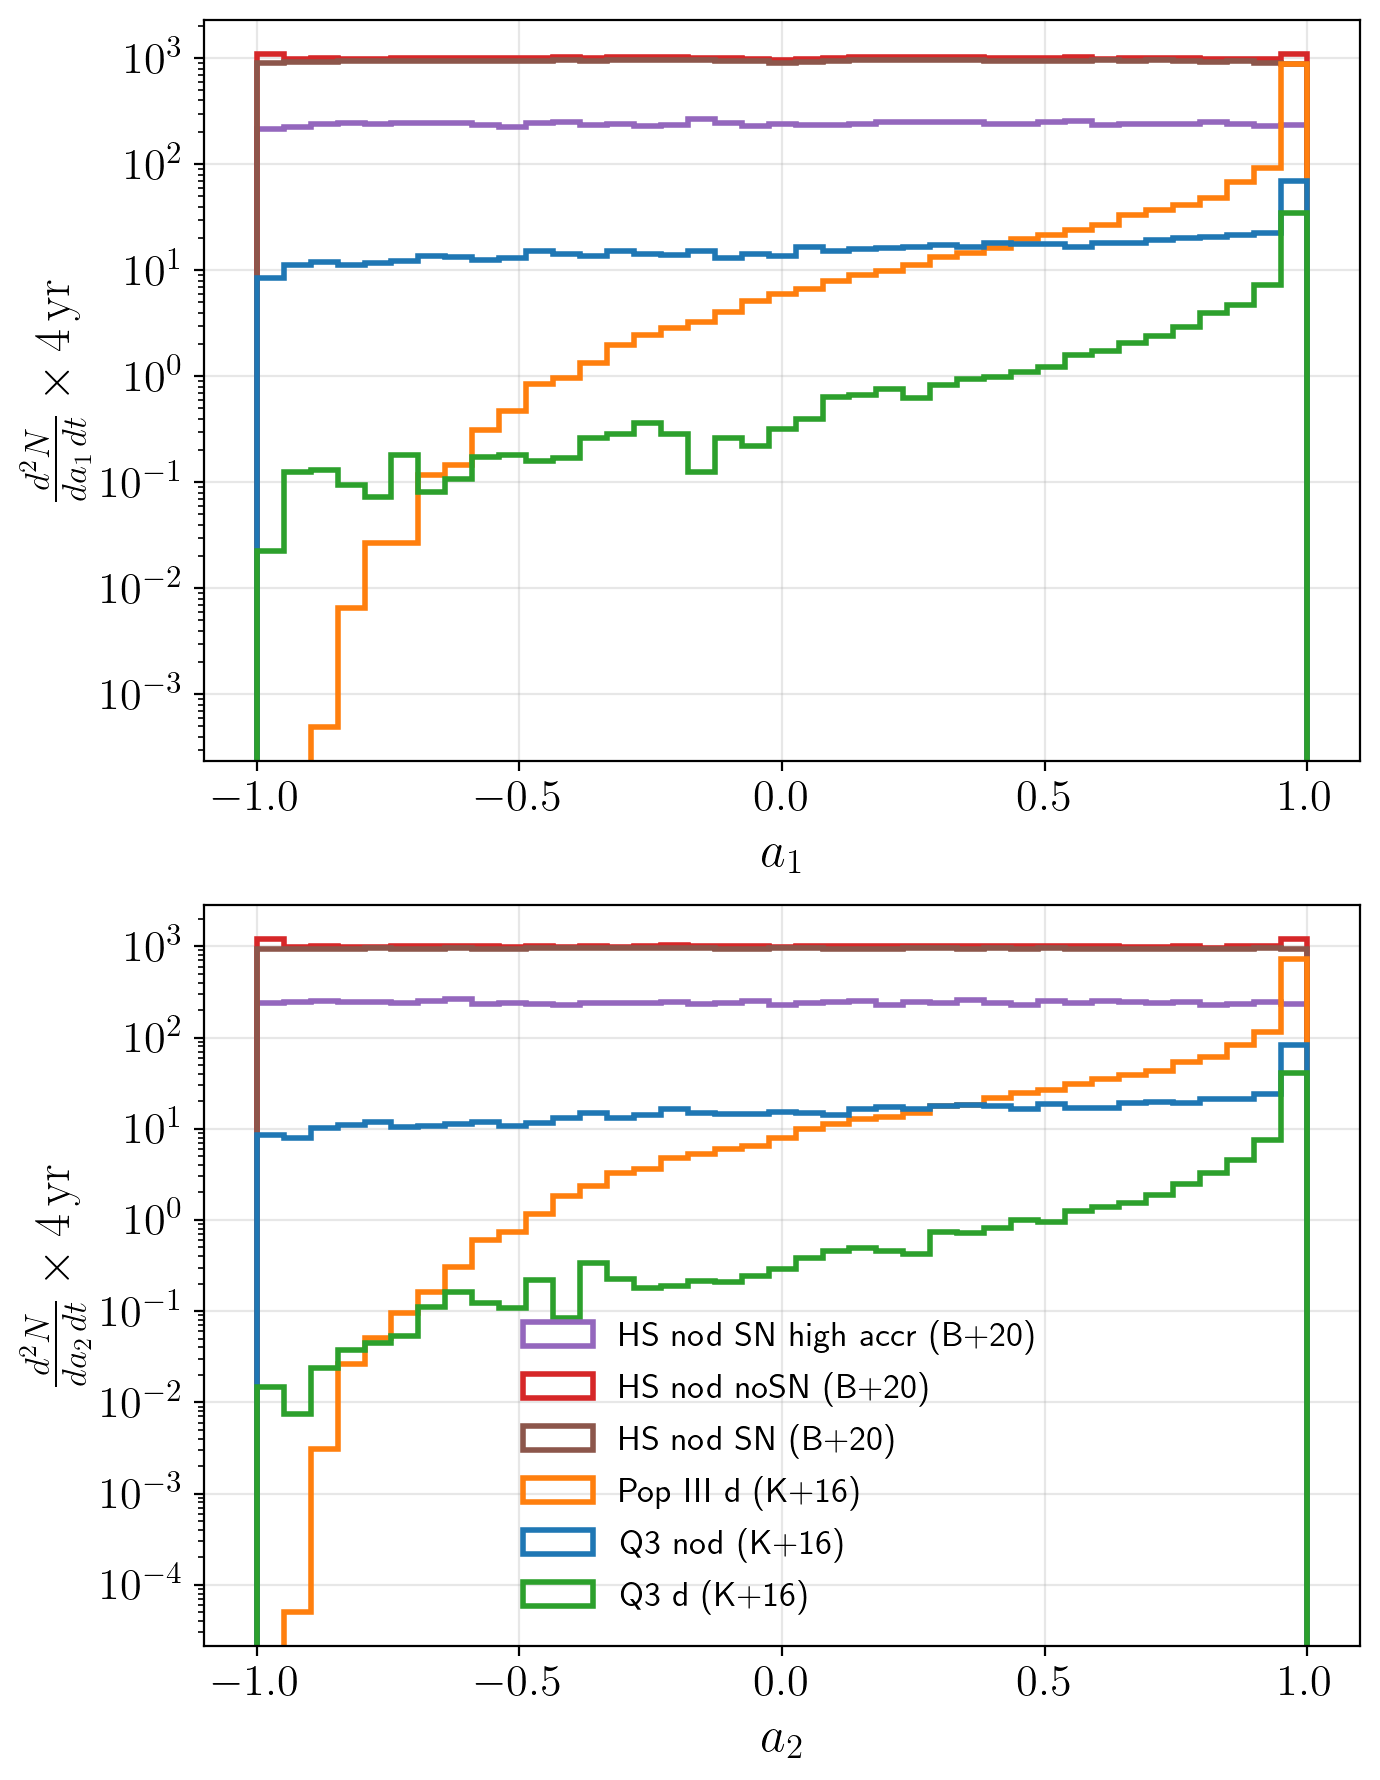

In [13]:
# Mismo merger rate que el anterior pero ahora vs a1 y a2

a_bins = np.linspace(-1, 1, 40)

fig, axs = plt.subplots(2, 1, figsize=(7,9), sharex=False)

for path, label, color in file_paths:
    data = pd.read_csv(path, delim_whitespace=True, names=column_names)
    data["DL"] = cosmo.luminosity_distance(data["z_merger"]).value
    data["d2N_dzdt"] = ( 4 * np.pi * c * data["halo_density"] * data["DL"]**2 / ((1 + data["z_merger"])**2)    )    
    a1_hist, a1_edges = np.histogram(data["a1"], bins=a_bins, weights=data["d2N_dzdt"])
    a2_hist, a2_edges = np.histogram(data["a2"], bins=a_bins, weights=data["d2N_dzdt"])


    axs[0].hist(
        0.5 * (a1_edges[:-1] + a1_edges[1:]),
        bins=a_bins,
        weights=a1_hist * 3600 * 24 * 365 * 4,
        histtype="step",
        color=color,
        label=label,
        linewidth=2
    )

    axs[1].hist(
        0.5 * (a2_edges[:-1] + a2_edges[1:]),
        bins=a_bins,
        weights=a2_hist * 3600 * 24 * 365 * 4,
        histtype="step",
        color=color,
        label=label,
        linewidth=2
    )
    

# ------ Graficar ------
#axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel(r"$a_1$", fontsize = 18)
axs[0].set_ylabel(r"$\frac{d^2N}{da_1 \, dt} \times 4 \, \mathrm{yr}$", fontsize = 18)
axs[0].grid(alpha=0.3)
axs[0].tick_params(labelsize=16)
#axs[0].set_ylim(4e-2, 1300)
axs[0].set_xlim(-1.1, 1.1)
axs[1].legend(frameon=False, fontsize = 12.5, loc = 'lower center')

axs[1].set_yscale("log")
axs[1].set_xlabel(r"$a_2$", fontsize = 18)
axs[1].set_ylabel(r"$\frac{d^2N}{da_2 \, dt} \times 4 \, \mathrm{yr}$", fontsize = 18)
axs[1].grid(alpha=0.3)
#axs[1].set_ylim(0.02, 300)
axs[1].tick_params(labelsize=16)
axs[1].set_xlim(-1.1,1.1)

plt.tight_layout()
plt.savefig('MergerRatesa1a2.pdf')
plt.show()

# Detected Rates

In [2]:
# Esta celda agarra el catalogo de eventos generado y le incorpora los parametros simulados de posicion y orientacion, 
# haciendo que cada evento de repita N veces con el set de parametros 

sampled_events = pd.read_csv("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_redshifts.csv")
parametros = pd.read_csv("parametrosgeneradosN100.csv")

n_eventos = len(sampled_events)

sampled_events_expanded = pd.DataFrame(np.repeat(sampled_events.values, 100, axis=0), columns=sampled_events.columns)
parametros_expanded = pd.concat([parametros] * n_eventos, ignore_index=True)

final_catalog = pd.concat([sampled_events_expanded.reset_index(drop=True), parametros_expanded], axis=1)
    
final_catalog.to_csv("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_catalog1M.csv", index=False)

In [10]:
# cantidad de realizaciones por archivo
pop = 1410.03
q3 = 73.523
q3nod = 657.221 
hsno = 36789.693
hsnono = 39363.806
hsha = 9406.90


file_paths = [
    ("HS-nod-SN-high-accr_signed.dat.bz2", "HS nod SN high accr (B+20)", "tab:purple", "orchid"),
    ("HSnodB20noSN_extrapolated_signed.dat.bz2", "HS nod noSN (B+20)", "tab:red", "coral"), 
    ("HSnodB20SN_extrapolated_signed.dat.bz2", "HS nod SN (B+20)", "tab:brown", "chocolate"),  
    ("popIII/popIII_K16_extrapolated.dat.bz2", "Pop III d (K+16)", "tab:orange", "gold"),
    ("q3nod/q3nod_K16_extrapolated.dat.bz2", "Q3 nod (K+16)", "tab:blue", "deepskyblue"),
    ("q3d/q3d_K16_extrapolated.dat.bz2", "Q3 d (K+16)", "tab:green", "limegreen")
]

print(10000/pop)
print(10000/q3)
print(10000/q3nod)
print(10000/hsno)
print(10000/hsnono)
print(10000/hsha)

7.092047686928647
136.01186023421243
15.215581973187101
0.27181526086667807
0.25404047565928967
1.0630494636915455


In [55]:
#Esta celda filtra los eventos con SNR > 8 y los clasifica como detectables, luego calcula un average detectability para cada evento simulado, junto con la mediana y moda de los SNR.

df = pd.read_csv('SecondRun/HSnodSN/HSnodSN_SNRLISAbeta.csv')

df['Detectable'] = df['SNR_LISAbeta'] > 8.001

group_cols = ['m1', 'm2', 'a1', 'a2', 'z_merger']

group_stats = df.groupby(group_cols).agg({
    'Detectable': 'mean',
    'SNR_LISAbeta': ['mean', 'median']
}).reset_index()

group_stats.columns = group_cols + ['Average_Detectability', 'Mean_SNR', 'Median_SNR']

df = df.merge(group_stats, on=group_cols, how='left')

df.to_csv("SecondRun/HSnodSN/HSnodSN_SNRLb_AveDet.csv", index=False)

In [56]:
# Esto agarra el catalogo con los SNR ya calculados (y el average detectability para cada evento) y  elimina las columnas con los parametros de posicion y orientacion,
# recuperando la cantidad de eventos sampleados segun cuantos eventos suceden en 4 años.

file_path = "SecondRun/HSnodSN/HSnodSN_SNRLb_AveDet.csv"
df = pd.read_csv(file_path)

columns_to_drop = ['tc', 'RA', 'DEC', 'phi_c', 'iota', 'psi']

df_filtered = df.drop(columns=columns_to_drop)

df_unique = df_filtered.drop_duplicates(subset=['m1', 'm2', 'a1', 'a2'])

output_path = "SecondRun/HSnodSN/HSnodSN_SNRLb_final.csv"
df_unique.to_csv(output_path, index=False)

print(f"Dimensiones finales: {df_unique.shape}")
print(f"Dimensiones finales: {df_filtered.shape}")

Dimensiones finales: (10000, 26)
Dimensiones finales: (1000000, 26)


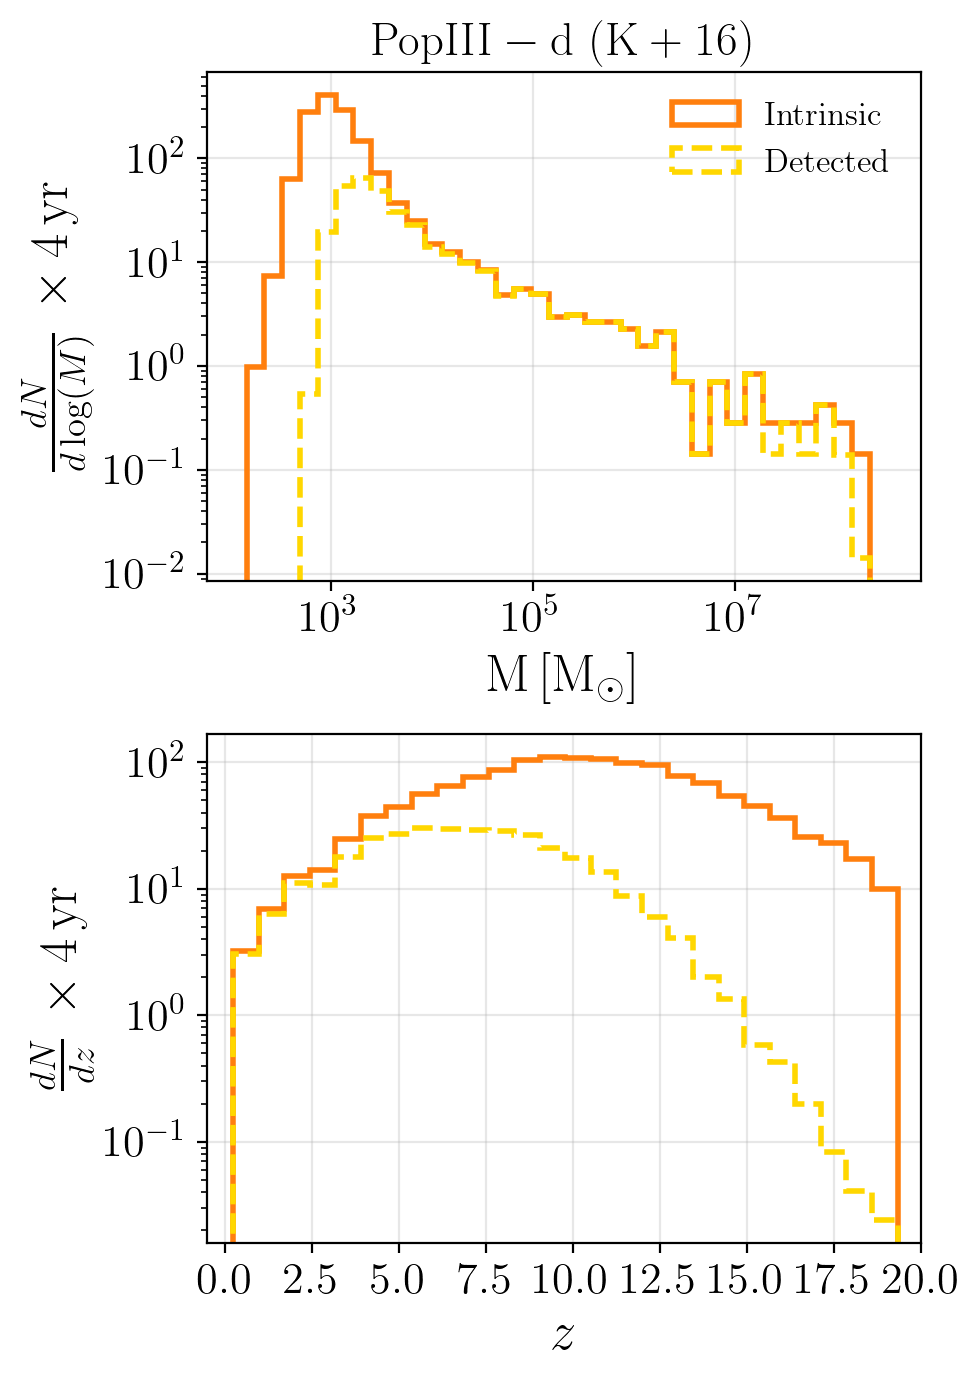

Total de eventos: 1410.03
Total de eventos detectables: 320.86642680000244


In [20]:
file_path = "SecondRun/PopIIId/popIII_SNRLb_final.csv"

n = 7.092047686928647

data = pd.read_csv(file_path)

# ------ Se ordenann los datos para crear los histogramas para las distribuciones ---------
# Histograma de redshift
z_bins = np.linspace(data["z_merger"].min(), data["z_merger"].max(), 27)

# Histograma de masa total
data["total_mass"] = data["m1"] + data["m2"]
mass_bins = np.logspace(np.log10(data["total_mass"].min()), np.log10(data["total_mass"].max()), 40)
mass_hist, mass_edges = np.histogram(data["total_mass"], bins=mass_bins)
mass_hist1, mass_edges = np.histogram(data["total_mass"], bins=mass_bins, weights = data["Average_Detectability"])

#----- Aplicar gaussiana en z ------
sigma_z = 0.55 
data["z_merger_noisy"] = data["z_merger"] + np.random.normal(0, sigma_z, len(data))

z_hist, z_edges = np.histogram(data["z_merger_noisy"], bins=z_bins)
z_hist1, z_edges = np.histogram(data["z_merger_noisy"], bins=z_bins, weights = data["Average_Detectability"])

# ------ Graficar ------
fig, axs = plt.subplots(2, 1, figsize=(5, 7), sharex=False)

axs[0].hist(
    0.5 * (mass_edges[:-1] + mass_edges[1:]), 
    bins=mass_bins,
    weights=mass_hist /n,
    histtype='step',
    stacked=True,
    fill=False,
    color="tab:orange",
    label=r'$\mathrm{Intrinsic}$',
    linewidth=2
)
axs[0].hist(
    0.5 * (mass_edges[:-1] + mass_edges[1:]), 
    bins=mass_bins,
    weights=mass_hist1 /n,
    histtype='step',
    stacked=True,
    fill=False,
    color="gold",
    label=r'$\mathrm{Detected}$',
    linestyle='--',
    linewidth=2
)
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel(r"$\mathrm{M} \, [\mathrm{M}_\odot]$", fontsize = 19)
axs[0].set_ylabel(r"$\frac{dN}{d\log(M)} \, \times 4 \, \mathrm{yr}$", fontsize = 19)
axs[0].grid(alpha=0.3)
axs[0].tick_params(labelsize=16)
#axs[0].set_ylim(2e-3, 2e4)
axs[0].set_xlim(60, 7e8)
axs[0].set_title(r'$\mathrm{PopIII-d\ (K+16)}$', fontsize = 17)
axs[0].legend(frameon=False, fontsize = 12)

axs[1].hist(
    0.5 * (z_edges[:-1] + z_edges[1:]),  
    bins=z_bins,
    weights=z_hist  /n,
    histtype='step',
    stacked=True,
    fill=False,
    color="tab:orange",
    label=r'$\mathrm{Intrinsic}$',
    linewidth=2
)
axs[1].hist(
    0.5 * (z_edges[:-1] + z_edges[1:]),  
    bins=z_bins,
    weights=z_hist1  /n,
    histtype='step',
    stacked=True,
    fill=False,
    color="gold",
    label=r'$\mathrm{Detected}$',
    linestyle='--',
    linewidth=2
)

axs[1].set_yscale("log")
axs[1].set_xlabel(r"$z$", fontsize = 19)
axs[1].set_ylabel(r"$\frac{dN}{dz} \, \times 4 \, \mathrm{yr}$" , fontsize = 19)
axs[1].tick_params(labelsize=16)
axs[1].set_xticks(np.arange(0, 21, 2.5))
axs[1].grid(alpha=0.3)
axs[1].set_xlim(-0.5, 20.0)
#axs[1].set_ylim(2e-3, 6.5e3)

plt.tight_layout()
plt.savefig("SecondRun/Images/popIII_detected.pdf", dpi=300)
plt.show()

print(f"Total de eventos: {np.sum(mass_hist)/n}" )
print(f"Total de eventos detectables: {np.sum(mass_hist1)/n}" )

In [2]:
# cantidad de eventos sumando todos los con Mean_SNR>8
files = [
    ("SecondRun/PopIIId/popIII_SNRLb_final.csv",7.092047686928647),
    ("SecondRun/Q3d/Q3d_SNRLb_final.csv",136.01186023421243),
    ("SecondRun/Q3nod/Q3nod_SNRLb_final.csv",15.215581973187101),
    ("SecondRun/HSnodnoSN/HSnodnoSN_SNRLb_final.csv",0.25404047565928967),
    ("SecondRun/HSnodSN/HSnodSN_SNRLb_final.csv",0.27181526086667807),
    ("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_SNRLb_final.csv",1.0630494636915455)
]

for f, n in files:
    df = pd.read_csv(f)
    count = (df["Mean_SNR"] > 8).sum() 
    print(f"{f}: {count/n} eventos con mean SNR > 8")

SecondRun/PopIIId/popIII_SNRLb_final.csv: 293.427243 eventos con mean SNR > 8
SecondRun/Q3d/Q3d_SNRLb_final.csv: 72.94216829999999 eventos con mean SNR > 8
SecondRun/Q3nod/Q3nod_SNRLb_final.csv: 652.8176193 eventos con mean SNR > 8
SecondRun/HSnodnoSN/HSnodnoSN_SNRLb_final.csv: 38793.030813 eventos con mean SNR > 8
SecondRun/HSnodSN/HSnodSN_SNRLb_final.csv: 36270.9583287 eventos con mean SNR > 8
SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_SNRLb_final.csv: 9285.55099 eventos con mean SNR > 8


# Scatter Plots SNR

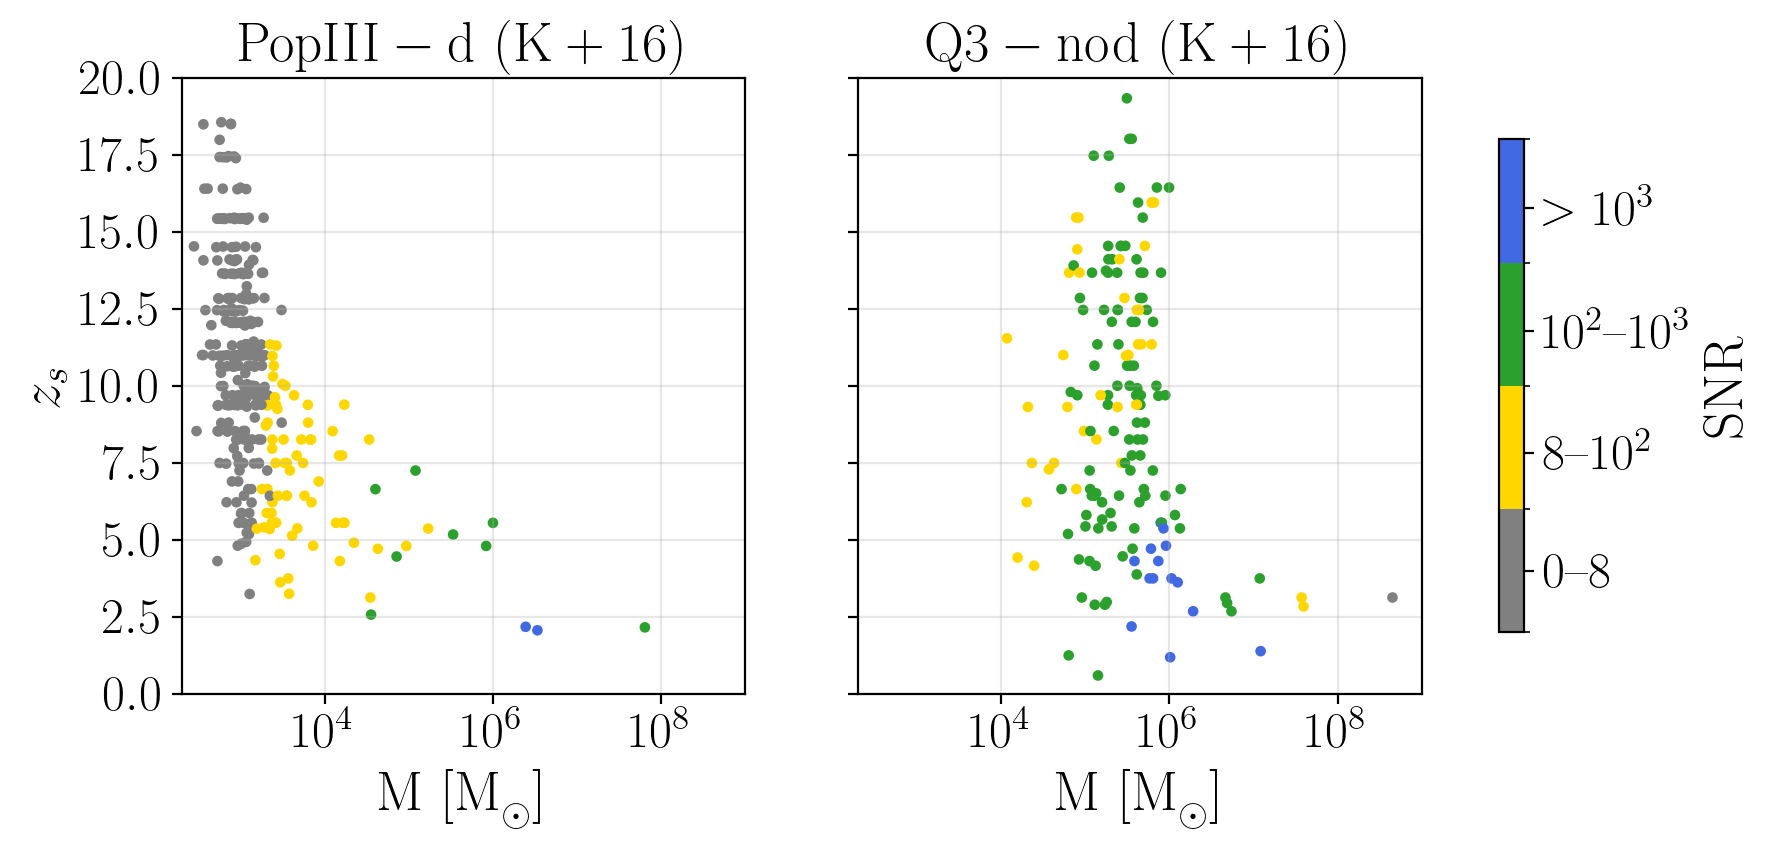

In [27]:
from matplotlib.colors import BoundaryNorm, ListedColormap

df1 = pd.read_csv("SecondRun/PopIIId/popIII_SNRLb_final.csv")
df2 = pd.read_csv("SecondRun/Q3nod/Q3nod_SNRLb_final.csv")

n1 = 1410 / 4
n2 = 657 / 4

df1_sample = df1.sample(n=int(n1), random_state=1)
df2_sample = df2.sample(n=int(n2), random_state=1)

bounds = [0, 8, 100,1000,  10000]
colors = ['grey', 'gold','tab:green', 'royalblue']
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, cmap.N)


fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=True)

sc0 = axs[0].scatter(
    df1_sample['m1'] + df1_sample['m2'],
    df1_sample['z_merger'],
    c=df1_sample['Mean_SNR'],
    cmap=cmap,
    norm=norm,
    s=8
)
axs[0].set_xscale("log")
axs[0].set_title(r'$\mathrm{PopIII-d\ (K+16)}$', fontsize = 20)
axs[0].set_xlabel(r"$\mathrm{M\ [M}_\odot]$", fontsize = 20)
axs[0].set_ylabel(r"$z_s$", fontsize = 20)
axs[0].grid(alpha=0.3)

axs[1].scatter(
    df2_sample['m1'] + df2_sample['m2'],
    df2_sample['z_merger'],
    c=df2_sample['Mean_SNR'],
    cmap=cmap,
    norm=norm,
    s=8
)
axs[1].set_xscale("log")
axs[1].set_title(r'$\mathrm{Q3-nod\ (K+16)}$', fontsize = 20)
axs[1].set_xlabel(r"$\mathrm{M\ [M}_\odot]$", fontsize = 20)
axs[1].grid(alpha=0.3)

cbar = fig.colorbar(sc0, ax=axs, orientation='vertical', pad=0.05, shrink=0.8)
cbar.set_label(r"$\mathrm{SNR}$", fontsize= 20)
cbar.set_ticks([4, 50, 500, 5000])  
cbar.set_ticklabels(['$0–8$', '$8–10^2$', '$10^2–10^3$', '$>10^3$'])
cbar.ax.tick_params(labelsize=18)

axs[0].set_xlim(2e2, 1e9)
axs[1].set_xlim(2e2, 1e9)
axs[0].set_ylim(0, 20)
axs[1].set_ylim(0, 20)
axs[0].set_yticks(np.arange(0, 21, 2.5))
axs[0].tick_params(labelsize=18)
axs[1].set_yticks(np.arange(0, 21, 2.5))
axs[1].tick_params( labelsize=18)

#plt.tight_layout()
plt.savefig("SecondRun/Images/scatterSNR_popIII_Q3nod" , dpi=300, bbox_inches="tight")
plt.show()

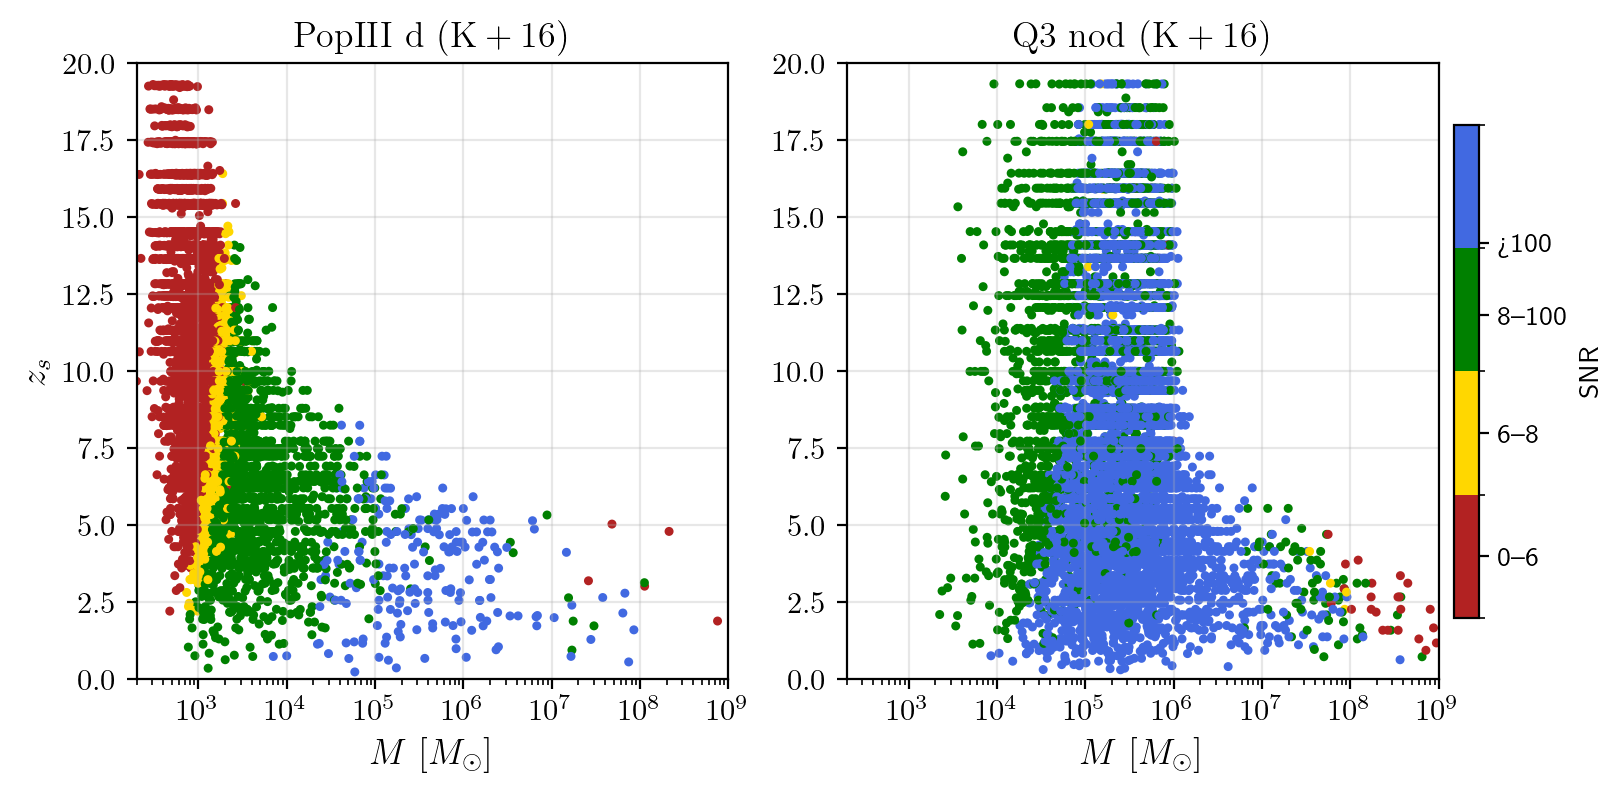

In [23]:
from matplotlib.colors import BoundaryNorm, ListedColormap

df1 = pd.read_csv("SecondRun/PopIIId/popIII_SNRLb_final.csv")
df2 = pd.read_csv("SecondRun/Q3nod/Q3nod_SNRLb_final.csv")

n1 = 1410 / 4
n2 = 657 / 4

df1_sample = df1.sample(n=int(n1), random_state=42)
df2_sample = df2.sample(n=int(n2), random_state=42)


bounds = [0, 6, 8, 100, 10000]
colors = ['firebrick', 'gold', 'green', 'royalblue']
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, cmap.N)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=False)

sc0 = axs[0].scatter(
    df1['m1'] + df1['m2'],
    df1['z_merger'],
    c=df1['Mean_SNR'],
    cmap=cmap,
    norm=norm,
    s=5
)
axs[0].set_xscale("log")
axs[0].set_title(r'$\mathrm{PopIII\ d\ (K+16)}$', fontsize = 13)
axs[0].set_xlabel(r"$M\ [M_\odot]$", fontsize = 13)
axs[0].set_ylabel(r"$z_s$", fontsize = 13)
axs[0].grid(alpha=0.3)

axs[1].scatter(
    df2['m1'] + df2['m2'],
    df2['z_merger'],
    c=df2['Mean_SNR'],
    cmap=cmap,
    norm=norm,
    s=5
)
axs[1].set_xscale("log")
axs[1].set_title(r'$\mathrm{Q3\ nod\ (K+16)}$', fontsize = 13)
axs[1].set_xlabel(r"$M\ [M_\odot]$", fontsize = 13)
axs[1].grid(alpha=0.3)

cbar = fig.colorbar(sc0, ax=axs, orientation='vertical', pad=0.01, shrink=0.8)
cbar.set_label("SNR")
cbar.set_ticks([3, 7, 50, 500])  
cbar.set_ticklabels(['0–6', '6–8', '8–100', '>100'])

axs[0].set_xlim(2e2, 1e9)
axs[1].set_xlim(2e2, 1e9)
axs[0].set_ylim(0, 20)
axs[1].set_ylim(0, 20)
axs[0].set_yticks(np.arange(0, 21, 2.5))
axs[0].tick_params(labelsize=14)
axs[1].set_yticks(np.arange(0, 21, 2.5))
axs[1].tick_params( labelsize=14)

#plt.tight_layout()
plt.show()

# Profundidades Opticas


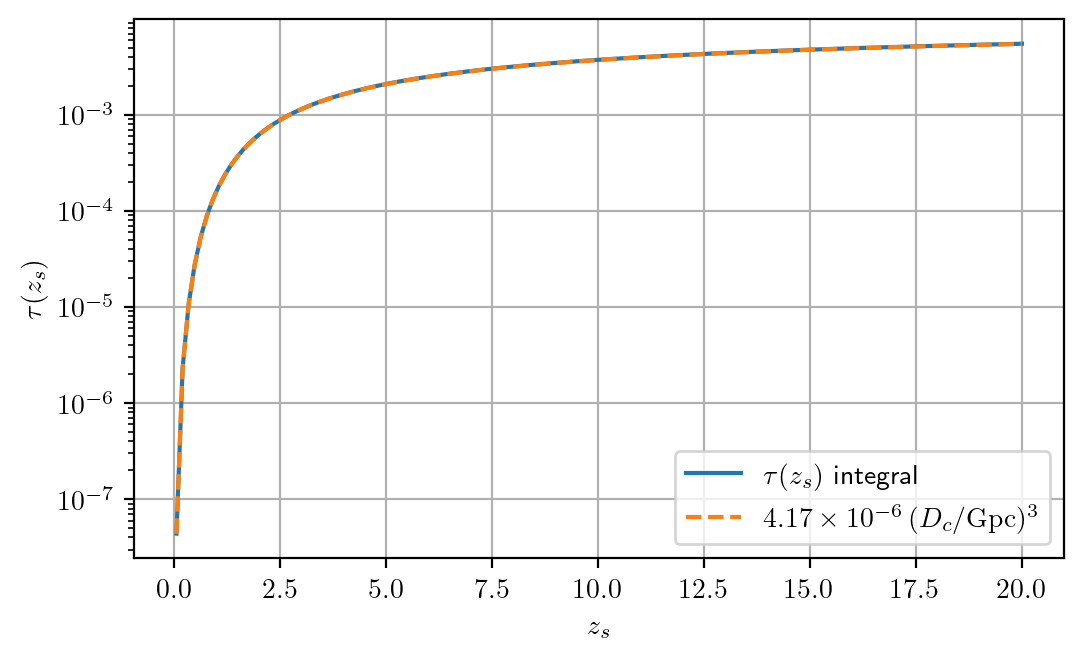

In [113]:
# HARIs 2018

h = 0.7
phi_star0 = 8e-3* (h)**3       
sigma_star = 161               
alpha, beta = 2.32, 2.67
nu_n, nu_v = 0, 0             
c_km_s = 3.0e5                   

prefactor = (16 * np.pi**3 * phi_star0 * gamma((4+alpha)/beta) / gamma(alpha/beta) * (sigma_star / c_km_s)**4)

def integrand(zL, zS):
    DL = cosmo.angular_diameter_distance(zL).to(u.Mpc).value
    DS = cosmo.angular_diameter_distance(zS).to(u.Mpc).value
    DLS = cosmo.angular_diameter_distance_z1z2(zL, zS).to(u.Mpc).value
    Hz = cosmo.H(zL).to(u.km/u.s/u.Mpc).value
    
    evo = (1.0 + zL)**(2.0 + nu_n + 4.0*nu_v)
    
    geom = (DL * DLS / DS)**2
    return evo * (c_km_s / Hz) * geom

def tau(zS):
    if zS <= 0:
        return 0.0
    val, _ = quad(integrand, 0.0, zS, args=(zS,), epsabs=0, epsrel=1e-5, limit=200)
    return prefactor * val

z_grid = np.linspace(0.05, 20.0, 140)
tau_vals = np.array([tau(z) for z in z_grid])

Dc = cosmo.comoving_distance(z_grid).to(u.Gpc).value  # comoving line-of-sight distance in Gpc
tau_approx = 4.17e-6 * Dc**3

plt.figure(figsize=(6,3.5))
plt.plot(z_grid, tau_vals, label=r'$\tau(z_s)$ integral')
plt.plot(z_grid, tau_approx, linestyle='--', label=r'$4.17\times10^{-6}\,(D_c/\mathrm{Gpc})^3$')
plt.yscale('log')
plt.xlabel(r"$z_s$")
plt.ylabel(r"$\tau(z_s)$")
plt.grid(True)
plt.legend()
plt.show()

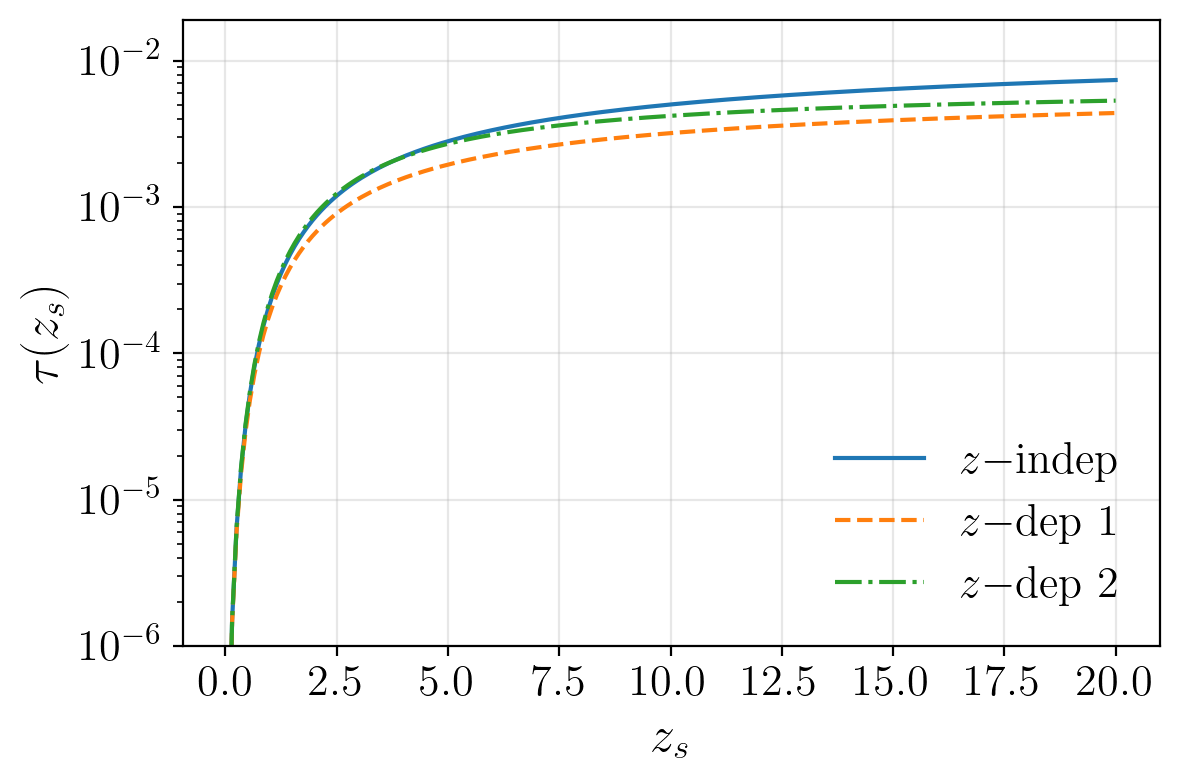

In [28]:
h = cosmo.h
H0 = cosmo.H0.value 
phi_star0 = 2.099e-2 * (h/0.7)**3   # Mpc^-3
sigma_star0 = 113.78                 # km/s
alpha, beta = 0.94, 1.85
nu_n, nu_v = -1.18,0.18               
c_km_s = 3.0e5                      # km/s

z_grid = np.linspace(0.05, 20.0, 200)

# --z independent model--

Dc = cosmo.comoving_distance(z_grid).to(u.Mpc).value  
F_star = 0.000489386
tau_indep = F_star  * (H0 * Dc / c_km_s) ** 3

# --z dependent 1--

prefactor = (16 * np.pi**3 * phi_star0 *c_km_s* gamma((4+alpha)/beta) / gamma(alpha/beta) * (sigma_star0 / c_km_s)**4)

def integrand(zL, zS):
    DL = cosmo.angular_diameter_distance(zL).to(u.Mpc).value
    DS = cosmo.angular_diameter_distance(zS).to(u.Mpc).value
    DLS = cosmo.angular_diameter_distance_z1z2(zL, zS).to(u.Mpc).value
    
    Hz = cosmo.H(zL).to(u.km/u.s/u.Mpc).value
    
    evo = (1.0 + zL)**(2.0 + nu_n + 4.0*nu_v)
    
    geom = (DL * DLS / DS)**2
    return evo / Hz * geom

def tau_dep1(zS):
    if zS <= 0:
        return 0.0
    val, _ = quad(integrand, 0.0, zS, args=(zS,), epsabs=0, epsrel=1e-5, limit=200)
    return prefactor * val

tau_dep1_vals = np.array([tau_dep1(z) for z in z_grid])

# -- z dependent 2 --

def phi_indep(sigma):    
    phi_indep = phi_star0 * (sigma/sigma_star0)**alpha * np.exp(-(sigma/sigma_star0)**beta) * beta/(gamma(alpha/beta) * sigma)
    return phi_indep

def phi_dep2(sigma, z):
    a0, a1, a2    = 7.391498,  5.729400,  -1.120552
    al0, al1, al2 = -6.863393, -5.273271,  1.104114
    be0, be1, be2 = 2.852083,  1.255696,  -0.286638
    ga0, ga1, ga2 = 0.067032,  -0.048683,  0.007648

    def phi_hyd(sigma, z):
        A_hyd     = a0  + a1*z  + a2*z**2
        alpha_hyd = al0 + al1*z + al2*z**2
        beta_hyd  = be0 + be1*z + be2*z**2
        gamma_hyd = ga0 + ga1*z + ga2*z**2
        sigma_star_hyd = 10**gamma_hyd

        x = np.log10(sigma / sigma_star_hyd)
        n = 10**(A_hyd + alpha_hyd*x + beta_hyd*x**2 - np.exp(x))

        phi1 = n/sigma * (alpha_hyd + 2*beta_hyd*x - np.exp(x))

        return phi1

    phi_z = phi_hyd(sigma, z)
    phi_0 = phi_hyd(sigma, 0.0)
    ratio = phi_z / phi_0

    return ratio * phi_indep(sigma)

def sigma_integral(zL):
    integrand = lambda s: s**4 * phi_dep2(s, zL)
    val, _ = quad(integrand, 1, 1e3, epsrel=1e-5)
    return val

def z_integral(zL, zS):
    DL = cosmo.angular_diameter_distance(zL).to(u.Mpc).value
    DS = cosmo.angular_diameter_distance(zS).to(u.Mpc).value
    DLS = cosmo.angular_diameter_distance_z1z2(zL, zS).to(u.Mpc).value
    Hz = cosmo.H(zL).to(u.km/u.s/u.Mpc).value
    
    geom = (DL*DLS/DS)**2
    return (1+zL)**2 / Hz * geom * sigma_integral(zL)

def tau_dep2(zS):
    pref = 16*np.pi**3 / c_km_s**3
    val, _ = quad(z_integral, 0, zS, args=(zS,), epsrel=1e-4, limit=200)
    return pref * val

tau_dep2_vals = np.array([tau_dep2(z) for z in z_grid])


# -- plot --

plt.figure(figsize=(6,4))

plt.plot(z_grid, tau_indep, linestyle='-', label=r'$z \mathrm{-indep}$', lw = 1.5)
plt.plot(z_grid, tau_dep1_vals, label=r'$z\mathrm{-dep\ 1}$', ls = '--', lw = 1.5)
plt.plot(z_grid, tau_dep2_vals, label=r'$z\mathrm{-dep\ 2}$', ls = '-.', lw = 1.5)

plt.yscale('log')
plt.xlabel(r"$z_s$", fontsize = 18)
plt.ylabel(r"$\tau(z_s)$",fontsize = 18)
plt.ylim(1e-6, 1.9e-2)
plt.grid(True, alpha= 0.3)
plt.xticks(np.arange(0, 21, 2.5))
plt.tick_params(labelsize = 16)
plt.legend(fontsize = 16, frameon=False)
plt.tight_layout()

plt.savefig("SecondRun/Images/tau_3models.pdf", dpi=300)
plt.show()

# Redshift distributions

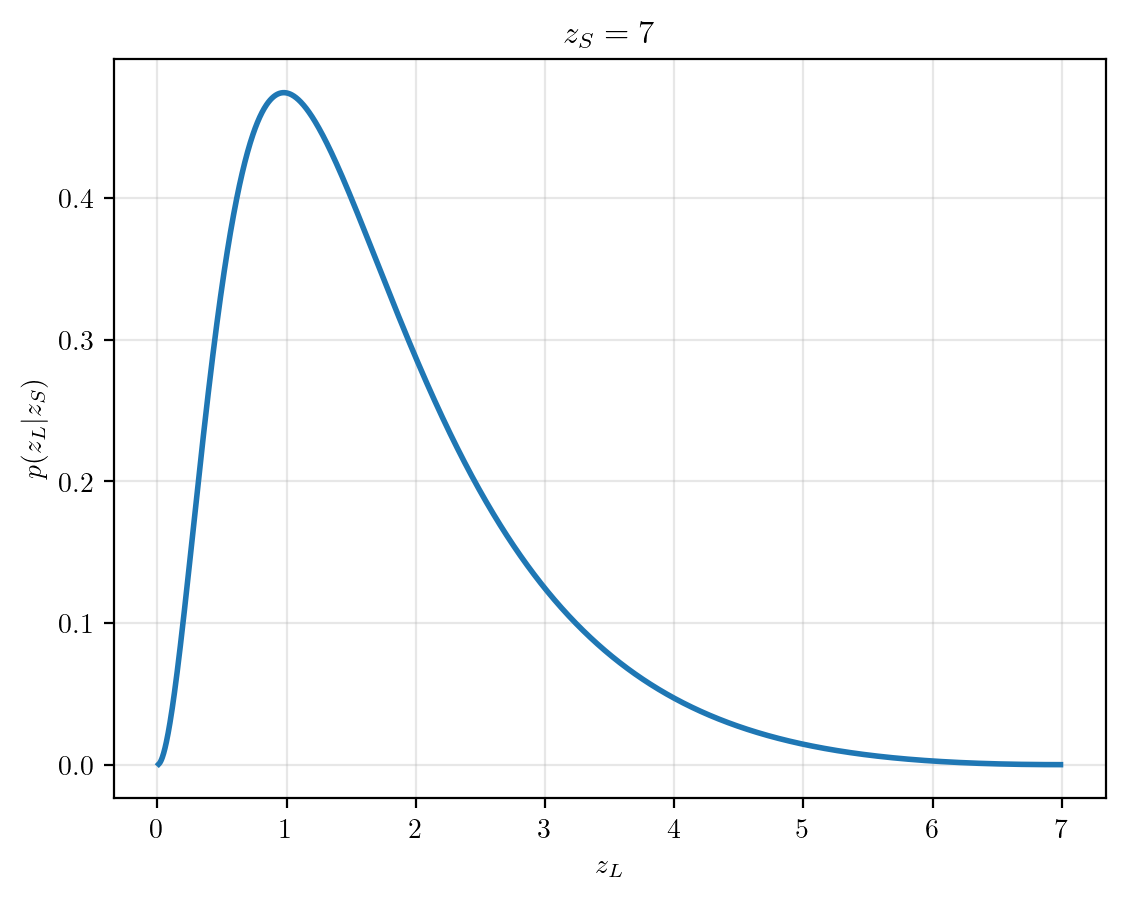

In [45]:
# grid para la distancia del lens 2 (redshift dependant)

zs = 7 
nun, nuv = 0,0

zl = np.linspace(0.01, zs-0.01, 2000)  

Dc_s = cosmo.comoving_distance(zs).value      
Dc_l = cosmo.comoving_distance(zl).value      
H_l  = cosmo.H(zl).value  

r = Dc_l / Dc_s

p = ((1 + zl)**(nun + 4*nuv)) * (r**2 * (1 - r)**2) / H_l

dz = np.gradient(zl)
p_norm = p / np.sum(p * dz)

plt.plot(zl, p_norm, lw=2)
plt.xlabel(r"$z_L$")
plt.ylabel(r"$p(z_L|z_S)$")
plt.title(f" $z_S={zs}$")
plt.grid(True, alpha=0.3)
plt.show()

In [89]:
# calculo del merger rate para samplear según peso

file_path = "HS-nod-SN-high-accr_signed.dat.bz2"

column_names = ["z_merger", "m1", "m2", "a1", "a2", "alpha", "beta", "gamma", "psi", "afin", "mfin", "vkick", "vesc_halo", "vesc_bar", "Mcluster", "Mdisk_stars", "Mdisk_gas", "Mbulge_stars", "Mbulge_gas", "MNSC", "Mreservoir", "Mhalo_final", "halo_density"]

data = pd.read_csv(file_path, sep='\s+', names=column_names)

c = 9.72e-15  # Velocidad de la luz en Mpc/s
 
def luminosity_distance(z):
    return cosmo.luminosity_distance(z).value  # (Entrega resultado en Mpc)
    
data["Dl_s"] = data["z_merger"].apply(luminosity_distance)

data["d2N_dzdt"] = (4 * np.pi * c * data["halo_density"] * data["Dl_s"]**2 / ((1 + data["z_merger"])**2))

data.to_csv("HS-nod-SN-high-accr_signed.dat.bz2", index=False)

In [112]:
# sampleo de 10000 eventos según peso de MR

data = pd.read_csv('HSnodB20SN_extrapolated_signed.dat.bz2')

time_factor = 31558149.8 * 4       # Pensado para 4 años (Año sideral en segundos x 4)

data["event_probability"] = data["d2N_dzdt"] * time_factor

probabilities = data["event_probability"] / data["event_probability"].sum()  # Normalizar las probabilidades

expected_events = int(data["event_probability"].sum())

print(f"Eventos esperados en 4 años: {expected_events}")

sampled_events = data.sample(n=10000, weights=probabilities, replace=False)
selected_columns = ["m1", "m2", "a1", "a2","Dl_s", "z_merger", "alpha", "beta", "gamma", "halo_density","d2N_dzdt"]  # Esto filtra dejando solo las columnas de interes 
sampled_events = sampled_events[selected_columns]

mask = sampled_events['m1'] < sampled_events['m2']                          # Esto reordena las columnas de manera que siempre se cumpla que m1>m2
sampled_events.loc[mask, ['m1', 'm2']] = sampled_events.loc[mask, ['m2', 'm1']].values
assert (sampled_events['m1'] >= sampled_events['m2']).all(), "Todavía hay casos donde m2 > m1"

sampled_events.to_csv("SecondRun/HSnodSN_redshifts.csv", index=False)


Eventos esperados en 4 años: 36815


In [113]:
# Calculo de redshifts y distancias 

from tqdm import tqdm
tqdm.pandas() 

nun, nuv = -1.18, 0.18
cmpc = 9.72e-15  # Velocidad luz Mpc/s

df = pd.read_csv("SecondRun/HSnodSN_redshifts.csv")  

zl_grid = np.linspace(0.01, df['z_merger'].max()-0.01,1000)

df["Dc_s"] = cosmo.comoving_distance(df["z_merger"]).value  
df["Da_s"] = cosmo.angular_diameter_distance(df["z_merger"]).value

# -- redshift independant (lens 1) --
df["Dc_l1"] = df["Dc_s"] * np.random.beta(3, 3, size=len(df))
df["z_l1"] = df["Dc_l1"].progress_apply(lambda d: z_at_value(cosmo.comoving_distance, d * u.Mpc).value)
df["Da_l1"] = cosmo.angular_diameter_distance(df["z_l1"]).value
df["Da_l1s"] = cosmo.angular_diameter_distance_z1z2(df["z_l1"], df["z_merger"]).value
#df["delta_t1"] = ((32 * np.pi**2) / cmpc) * (df["sigma"] / ckm)**4 * (df["aDl"] * df["aDls"] / df["aDs"]) * (1 + df["z_lens"])
#df["timedelay"] = df["y"] * df["delta_t1"]

# -- redshift dependant 1 (lens 2) --
def pdf_zl_given_zs(zs, zl_grid):
    Dc_s = cosmo.comoving_distance(zs).value
    Dc_l = cosmo.comoving_distance(zl_grid).value
    H_l  = cosmo.H(zl_grid).value
    r = Dc_l / Dc_s
    pdf =((1 + zl_grid)**(nun + 4*nuv)) * (r**2 * (1-r)**2) / H_l
    pdf /= np.trapezoid(pdf, zl_grid)
    return pdf

def sample_zl(zs, ngrid=200):
    zl_grid = np.linspace(0.01, zs-0.01, ngrid)
    pdf = pdf_zl_given_zs(zs, zl_grid)
    cdf = np.cumsum((pdf[:-1]+pdf[1:]) * np.diff(zl_grid)/2)
    cdf = np.concatenate([[0], cdf/cdf[-1]])
    u = np.random.rand()
    return np.interp(u, cdf, zl_grid)

df['z_l2'] = df['z_merger'].apply(sample_zl)
df["Dc_l2"] = cosmo.comoving_distance(df["z_l2"]).value  
df["Da_l2"] = cosmo.angular_diameter_distance(df["z_l2"]).value
df["Da_l2s"] = cosmo.angular_diameter_distance_z1z2(df["z_l2"], df["z_merger"]).value
#df["delta_t2"] = ((32 * np.pi**2) / cmpc) * (df["sigma"] / ckm)**4 * (df["aDl"] * df["aDls"] / df["aDs"]) * (1 + df["z_lens"])
#df["timedelay"] = df["y"] * df["delta_t2"]

df.to_csv("SecondRun/HSnodSN_redshifts.csv", index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1000.10it/s]


In [92]:
# -- redshift dependant 2 (lens 3) --

def phi_indep(sigma):
    phi_star0 = 2.099e-2 * (cosmo.h/0.7)**3
    sigma_star = 113.78
    alpha, beta = 0.94, 1.85
    return phi_star0*(sigma/sigma_star)**alpha*np.exp(-(sigma/sigma_star)**beta)*beta/(gamma(alpha/beta)*sigma)

def phi_dep2(sigma, z):
    a0, a1, a2   = 7.391498, 5.729400, -1.120552
    al0, al1, al2 = -6.863393, -5.273271, 1.104114
    be0, be1, be2 = 2.852083, 1.255696, -0.286638
    ga0, ga1, ga2 = 0.067032, -0.048683, 0.007648

    def phi_hyd(sigma, z):
        A_hyd     = a0  + a1*z  + a2*z**2
        alpha_hyd = al0 + al1*z + al2*z**2
        beta_hyd  = be0 + be1*z + be2*z**2
        gamma_hyd = ga0 + ga1*z + ga2*z**2
        sigma_star_hyd = 10**gamma_hyd

        x = np.log10(sigma / sigma_star_hyd)
        n = 10**(A_hyd + alpha_hyd*x + beta_hyd*x**2 - np.exp(x))

        dlogn_dx = alpha_hyd + 2*beta_hyd*x - np.exp(x)
        dlogn_dsigma = dlogn_dx / (sigma * np.log(10))
        dndsigma = n * np.log(10) * dlogn_dsigma
        return -dndsigma

    phi_z = phi_hyd(sigma, z)
    phi_0 = phi_hyd(sigma, 0.0)
    ratio = phi_z / phi_0

    return ratio * phi_indep(sigma)

def sigma_integral(zL):
    integrand = lambda s: s**4 * phi_dep2(s, zL)
    val, _ = quad(integrand, 1, 1e3, epsrel=1e-5)
    return val

def build_sigma_interp(zmin=0.01, zmax=20, ngrid=100):
    z_vals = np.linspace(zmin, zmax, ngrid)
    sig_vals = np.array([sigma_integral(z) for z in z_vals])
    return interp1d(z_vals, sig_vals, kind="cubic", bounds_error=False, fill_value="extrapolate")

sigma_interp = build_sigma_interp()

def pdf_zl_given_zs(zs, zl_grid):
    Dc_s = cosmo.comoving_distance(zs).value
    Dc_l = cosmo.comoving_distance(zl_grid).value
    H_l  = cosmo.H(zl_grid).value
    r = Dc_l / Dc_s
    sig_vals = sigma_interp(zl_grid)
    pdf =(r**2 * (1-r)**2) / H_l * sig_vals
    norm = np.trapezoid(pdf, zl_grid)
    if norm == 0:
        return np.zeros_like(pdf)
    return pdf / norm

def sample_zl(zs, ngrid=200):
    zl_grid = np.linspace(0.01, zs-0.01, ngrid)
    pdf = pdf_zl_given_zs(zs, zl_grid)
    cdf = np.cumsum((pdf[:-1]+pdf[1:]) * np.diff(zl_grid)/2)
    cdf = np.concatenate([[0], cdf/cdf[-1]])
    u = np.random.rand()
    return np.interp(u, cdf, zl_grid)

df = pd.read_csv("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_SNRLb_final.csv")

df['z_l3'] = df['z_merger'].apply(sample_zl)
df["Dc_l3"] = cosmo.comoving_distance(df["z_l3"]).value  
df["Da_l3"] = cosmo.angular_diameter_distance(df["z_l3"]).value
df["Da_l3s"] = cosmo.angular_diameter_distance_z1z2(df["z_l3"], df["z_merger"]).value

df.to_csv("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_SNRLb_final.csv", index=False)


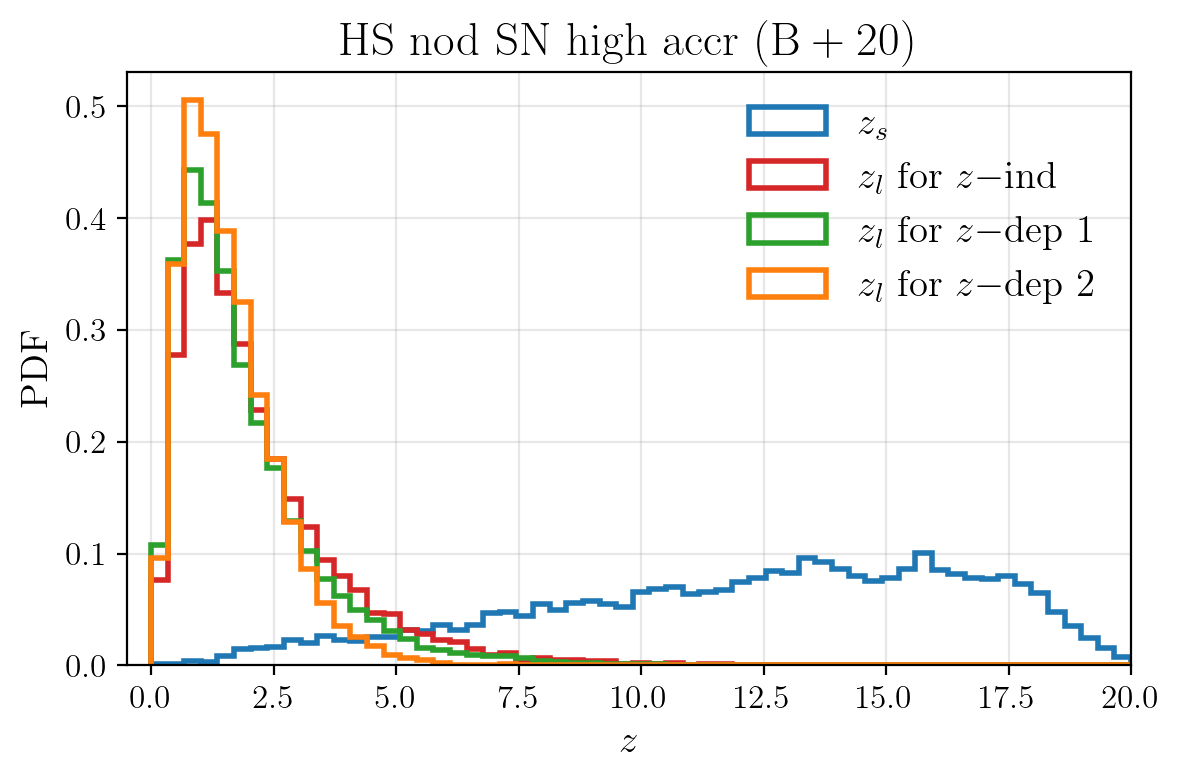

Porcentaje de eventos con z_l1 < 1: 24.14
Porcentaje de eventos con z_l1 < 3: 77.73
Porcentaje de eventos con z_l1 < 6: 96.46000000000001
Porcentaje de eventos con z_l2 < 1: 30.259999999999998
Porcentaje de eventos con z_l2 < 3: 83.11
Porcentaje de eventos con z_l2 < 6: 97.78
Porcentaje de eventos con z_l3 < 1: 31.5
Porcentaje de eventos con z_l3 < 3: 91.07
Porcentaje de eventos con z_l3 < 6: 99.86


In [94]:
# --plots--

bins = np.linspace(0, 20, 60) 

df = pd.read_csv("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_SNRLb_final.csv")

df["z_merger_noisy"] = df["z_merger"] + np.random.normal(0, 0.55, len(df))

plt.figure(figsize=(6, 4))
plt.title(r'$\mathrm{HS\ nod\ SN\ high\ accr\ (B+20)}$', fontsize=17)

plt.hist(df["z_merger_noisy"], bins=bins, histtype='step', linewidth=2, ls = '-', color='tab:blue', label=r'$z_s$', density= True)
plt.hist(df["z_l1"], bins=bins, histtype='step',           linewidth=2, ls = '-', color='tab:red', label=r'$z_L \mathrm{\ for\ } z \mathrm{-ind}$', density= True)
plt.hist(df["z_l2"],  bins=bins, histtype='step',          linewidth=2, ls = '-', color='tab:green', label=r'$z_L \mathrm{\ for\ } z \mathrm{-dep\ 1}$', density= True)
plt.hist(df["z_l3"],  bins=bins, histtype='step',          linewidth=2, ls = '-', color='tab:orange', label=r'$z_L \mathrm{\ for\ } z \mathrm{-dep\ 2}$', density= True)


plt.xlabel(r'$z$', fontsize=14)
plt.ylabel(r'$\mathrm{PDF}$', fontsize=14)
plt.xticks(np.arange(0, 21, 2.5)) 
plt.tick_params(labelsize=12)
plt.grid(visible=None, which='major', axis='both', alpha=0.3)
plt.legend(frameon=False, fontsize=14)
plt.xlim(-0.5, 20)
plt.savefig("Images/zlzs_HSnodSNhighaccr.pdf", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

N = len(df)

print("Porcentaje de eventos con z_l1 < 1:", (df["z_l1"].lt(1).sum() / N) * 100)
print("Porcentaje de eventos con z_l1 < 3:", (df["z_l1"].lt(3).sum() / N) * 100)
print("Porcentaje de eventos con z_l1 < 6:", (df["z_l1"].lt(6).sum() / N) * 100)
print("Porcentaje de eventos con z_l2 < 1:", (df["z_l2"].lt(1).sum() / N) * 100)
print("Porcentaje de eventos con z_l2 < 3:", (df["z_l2"].lt(3).sum() / N) * 100)
print("Porcentaje de eventos con z_l2 < 6:", (df["z_l2"].lt(6).sum() / N) * 100)
print("Porcentaje de eventos con z_l3 < 1:", (df["z_l3"].lt(1).sum() / N) * 100)
print("Porcentaje de eventos con z_l3 < 3:", (df["z_l3"].lt(3).sum() / N) * 100)
print("Porcentaje de eventos con z_l3 < 6:", (df["z_l3"].lt(6).sum() / N) * 100)

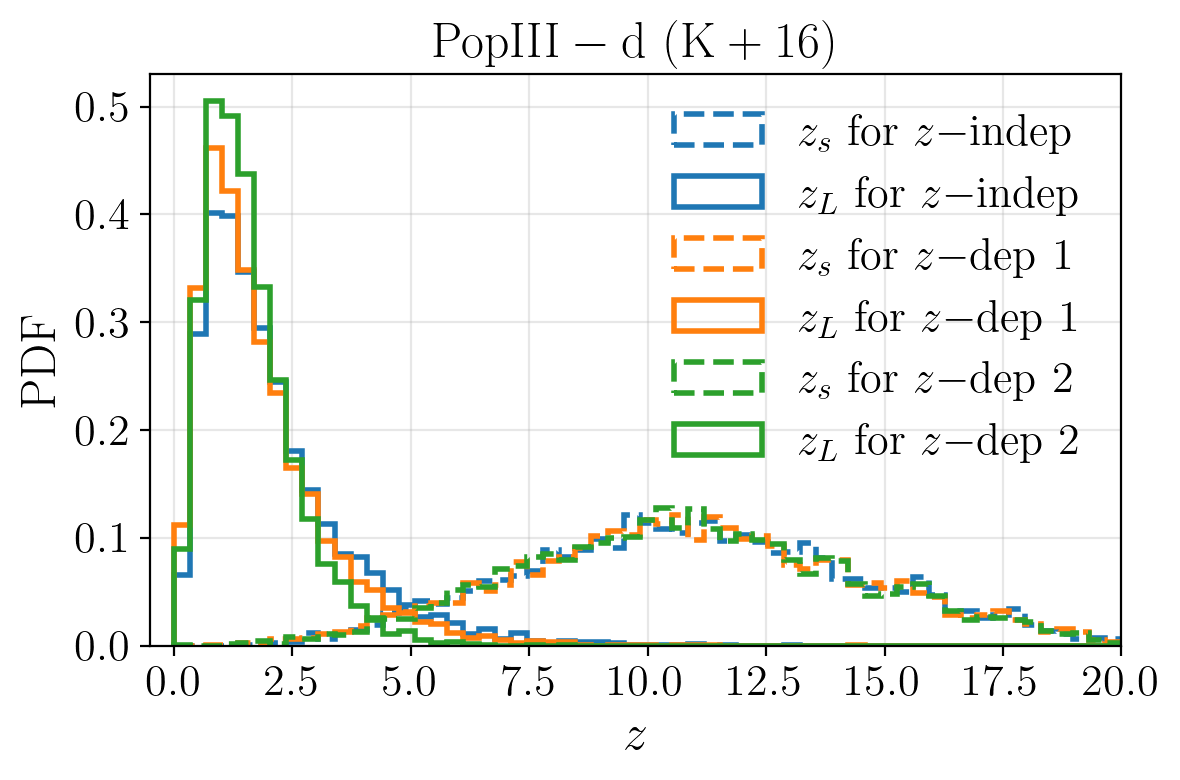

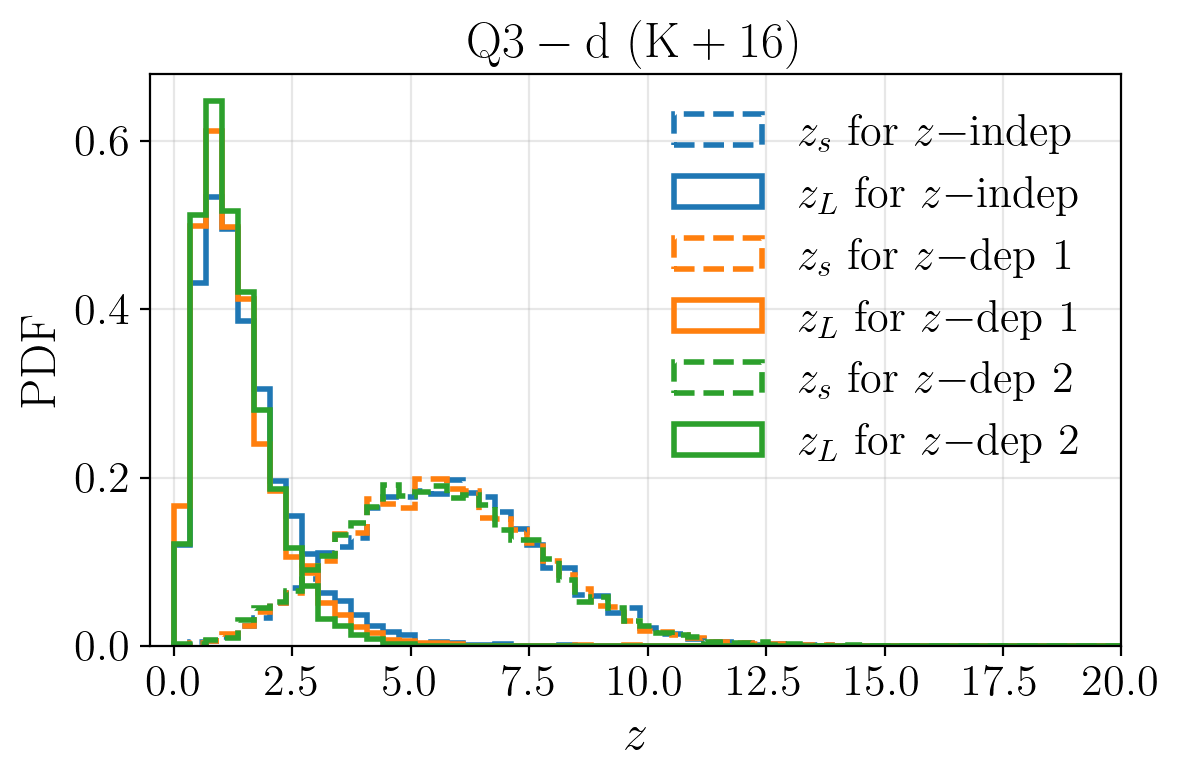

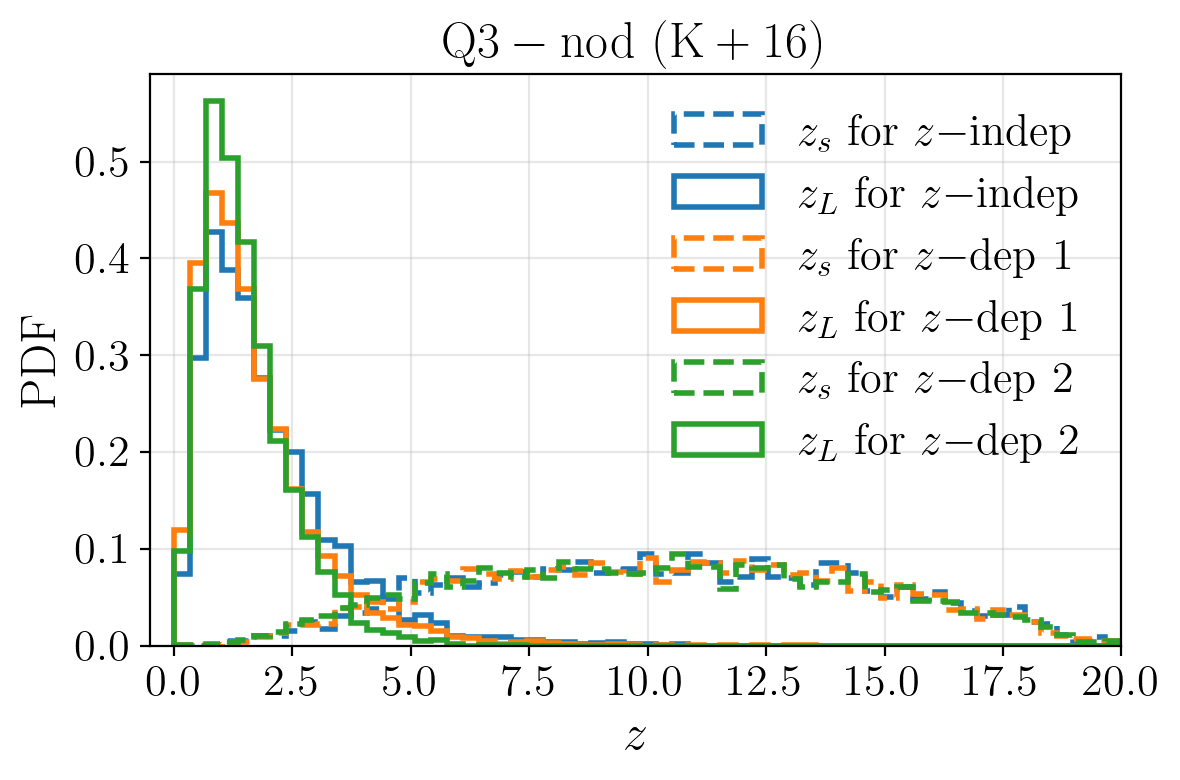

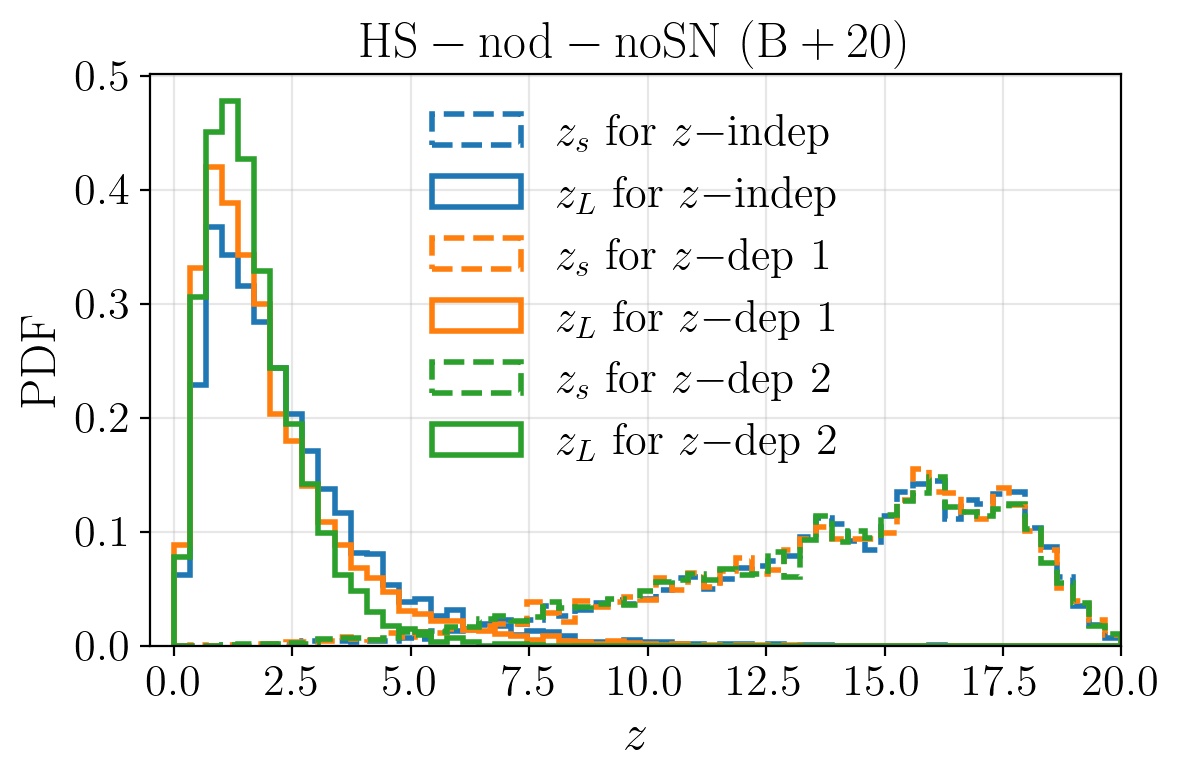

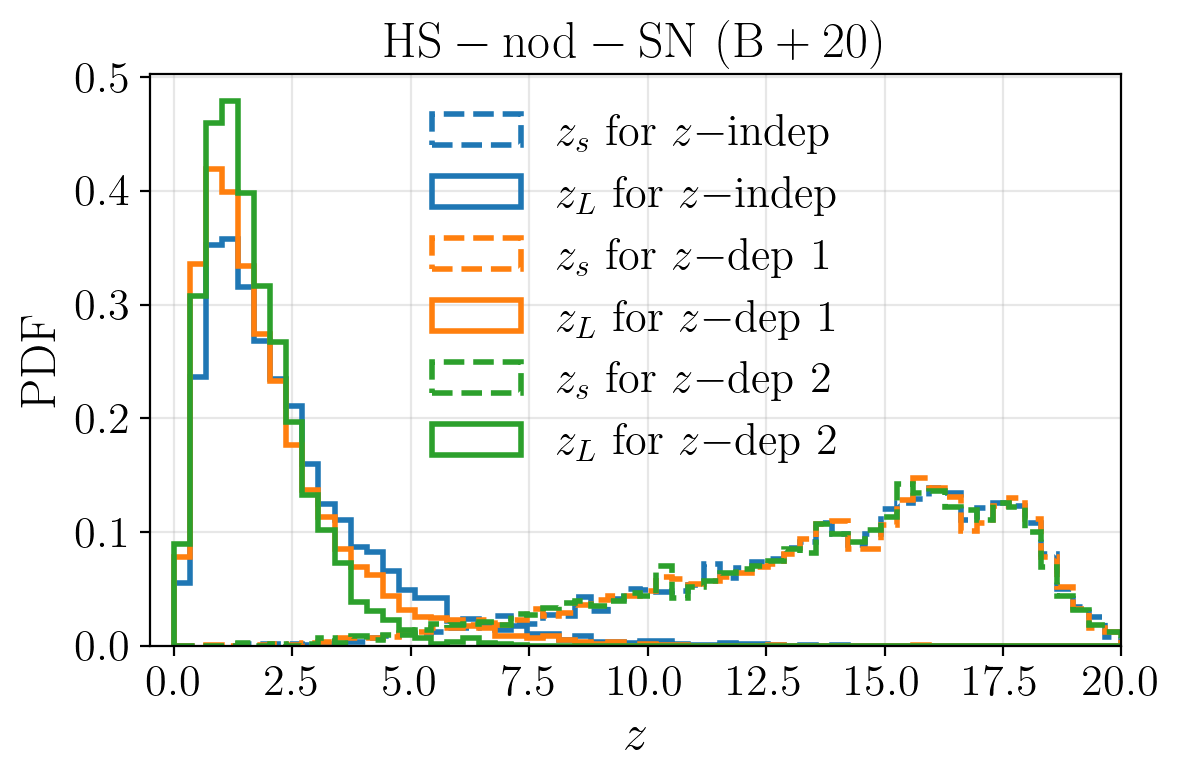

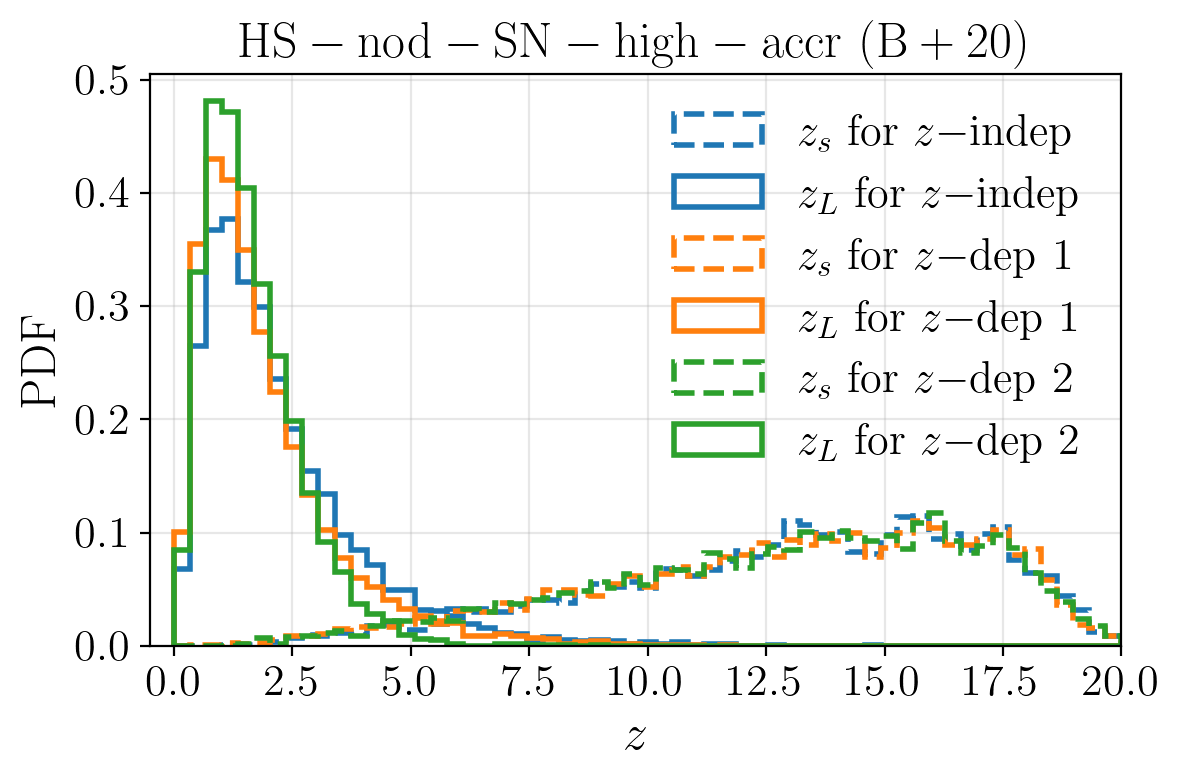

In [126]:
# --plots--

bins = np.linspace(0, 20, 60) 

paths= [("SecondRun/PopIIId/popIII_z_indep.csv","SecondRun/PopIIId/popIII_z_dep1.csv","SecondRun/PopIIId/popIII_z_dep2.csv",'PopIII-d\ (K+16)', "popIIId"),
        ("SecondRun/Q3d/Q3d_z_indep.csv","SecondRun/Q3d/Q3d_z_dep1.csv","SecondRun/Q3d/Q3d_z_dep2.csv",'Q3-d\ (K+16)', "Q3d"),
        ("SecondRun/Q3nod/Q3nod_z_indep.csv","SecondRun/Q3nod/Q3nod_z_dep1.csv","SecondRun/Q3nod/Q3nod_z_dep2.csv",'Q3-nod\ (K+16)', "Q3nod"),
        ("SecondRun/HSnodnoSN/HSnodnoSN_z_indep.csv","SecondRun/HSnodnoSN/HSnodnoSN_z_dep1.csv","SecondRun/HSnodnoSN/HSnodnoSN_z_dep2.csv",'HS-nod-noSN\ (B+20)', "HSnodnoSN"),
        ("SecondRun/HSnodSN/HSnodSN_z_indep.csv","SecondRun/HSnodSN/HSnodSN_z_dep1.csv","SecondRun/HSnodSN/HSnodSN_z_dep2.csv",'HS-nod-SN\ (B+20)', "HSnodSN"),
        ("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_indep.csv","SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_dep1.csv","SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_dep2.csv",'HS-nod-SN-high-accr\ (B+20)', "HSnodSNhighaccr")    
]

for file1, file2, file3, title, path in paths:
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    df3 = pd.read_csv(file3)
    
    df1["z_merger_noisy"] = df1["z_merger"] + np.random.normal(0, 0.55, len(df1))
    df2["z_merger_noisy"] = df2["z_merger"] + np.random.normal(0, 0.55, len(df2))
    df3["z_merger_noisy"] = df3["z_merger"] + np.random.normal(0, 0.55, len(df3))
    
    plt.figure(figsize=(6, 4))
    plt.title(rf'$\mathrm{{{title}}}$', fontsize=18)
    
    plt.hist(df1["z_merger_noisy"], bins=bins, histtype='step', linewidth=2, ls = '--', color='tab:blue', label=r'$z_s \mathrm{\ for\ } z \mathrm{-indep}$', density= True)
    plt.hist(df1["z_l1"], bins=bins, histtype='step',           linewidth=2, ls = '-', color='tab:blue', label=r'$z_L \mathrm{\ for\ } z \mathrm{-indep}$', density= True)

    plt.hist(df2["z_merger_noisy"], bins=bins, histtype='step', linewidth=2, ls = '--', color='tab:orange', label=r'$z_s \mathrm{\ for\ } z \mathrm{-dep\ 1}$', density= True)
    plt.hist(df2["z_l2"],  bins=bins, histtype='step',          linewidth=2, ls = '-', color='tab:orange', label=r'$z_L \mathrm{\ for\ } z \mathrm{-dep\ 1}$', density= True)

    plt.hist(df3["z_merger_noisy"], bins=bins, histtype='step', linewidth=2, ls = '--', color='tab:green', label=r'$z_s \mathrm{\ for\ } z \mathrm{-dep\ 2}$', density= True)
    plt.hist(df3["z_l3"],  bins=bins, histtype='step',          linewidth=2, ls = '-', color='tab:green', label=r'$z_L \mathrm{\ for\ } z \mathrm{-dep\ 2}$', density= True)
    
    
    plt.xlabel(r'$z$', fontsize=18)
    plt.ylabel(r'$\mathrm{PDF}$', fontsize=18)
    plt.xticks(np.arange(0, 21, 2.5)) 
    plt.tick_params(labelsize=16)
    plt.grid(visible=None, which='major', axis='both', alpha=0.3)
    plt.legend(frameon=False, fontsize=16)
    plt.xlim(-0.5, 20)
    plt.savefig(f"SecondRun/Images/zlzs2_{path}.pdf", dpi=300, bbox_inches="tight")
    plt.tight_layout()
    plt.show()


# Lensed Events

In [117]:
# Calculo de profundidades opticas y cantidad de eventos lenseados 

import pandas as pd
from tqdm import tqdm
tqdm.pandas()  

F_star = 0.000489386 

files = [
    ("SecondRun/PopIIId/popIII_SNRLb_final.csv",7.092047686928647),
    ("SecondRun/Q3d/Q3d_SNRLb_final.csv",136.01186023421243),
    ("SecondRun/Q3nod/Q3nod_SNRLb_final.csv",15.215581973187101),
    ("SecondRun/HSnodnoSN/HSnodnoSN_SNRLb_final.csv",0.25404047565928967),
    ("SecondRun/HSnodSN/HSnodSN_SNRLb_final.csv",0.27181526086667807),
    ("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_SNRLb_final.csv",1.0630494636915455)
]

for file_path, norm in files:
    print(f"\nProcesando archivo: {file_path}")
    df = pd.read_csv(file_path)

    df["tau_indep"] = F_star * (cosmo.H0.value * df["Dc_s"] / c_km_s) ** 3
    df["tau_dep1"] = df["z_merger"].progress_apply(lambda z: tau_dep1(z))
    df["tau_dep2"] = df["z_merger"].progress_apply(lambda z: tau_dep2(z))

    print(f"Total de eventos: {len(df)/norm:.3f}")
    print(f"Total lenseados tau indep: {df['tau_indep'].sum()/norm:.3f}")
    print(f"Total lenseados tau dep 1: {df['tau_dep1'].sum()/norm:.3f}")
    print(f"Total lenseados tau dep 2: {df['tau_dep2'].sum()/norm:.3f}")

    df.to_csv(file_path, index=False)


Procesando archivo: SecondRun/PopIIId/popIII_SNRLb_final.csv


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [15:20<00:00, 10.87it/s]


Total de eventos: 1410.030
Total lenseados tau indep: 6.897
Total lenseados tau dep 1: 4.376
Total lenseados tau dep 2: 5.697

Procesando archivo: SecondRun/Q3d/Q3d_SNRLb_final.csv


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:42<00:00, 21.60it/s]


Total de eventos: 73.523
Total lenseados tau indep: 0.199
Total lenseados tau dep 1: 0.136
Total lenseados tau dep 2: 0.186

Procesando archivo: SecondRun/Q3nod/Q3nod_SNRLb_final.csv


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [13:43<00:00, 12.14it/s]


Total de eventos: 657.221
Total lenseados tau indep: 2.904
Total lenseados tau dep 1: 1.857
Total lenseados tau dep 2: 2.426

Procesando archivo: SecondRun/HSnodnoSN/HSnodnoSN_SNRLb_final.csv


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [19:33<00:00,  8.52it/s]


Total de eventos: 39363.806
Total lenseados tau indep: 231.289
Total lenseados tau dep 1: 142.757
Total lenseados tau dep 2: 180.804

Procesando archivo: SecondRun/HSnodSN/HSnodSN_SNRLb_final.csv


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [19:23<00:00,  8.59it/s]


Total de eventos: 36789.693
Total lenseados tau indep: 215.574
Total lenseados tau dep 1: 133.140
Total lenseados tau dep 2: 168.738

Procesando archivo: SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_SNRLb_final.csv


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [19:00<00:00,  8.77it/s]


Total de eventos: 9406.900
Total lenseados tau indep: 51.155
Total lenseados tau dep 1: 31.878
Total lenseados tau dep 2: 40.742


In [119]:
# Sampleo de eventos segun cada modelo de lente

import pandas as pd
from tqdm import tqdm
tqdm.pandas()  

files = [
    ("SecondRun/PopIIId/popIII_SNRLb_final.csv","SecondRun/PopIIId/popIII_z_indep.csv", "SecondRun/PopIIId/popIII_z_dep1.csv", "SecondRun/PopIIId/popIII_z_dep2.csv"),
    ("SecondRun/Q3d/Q3d_SNRLb_final.csv", "SecondRun/Q3d/Q3d_z_indep.csv", "SecondRun/Q3d/Q3d_z_dep1.csv", "SecondRun/Q3d/Q3d_z_dep2.csv"), 
    ("SecondRun/Q3nod/Q3nod_SNRLb_final.csv", "SecondRun/Q3nod/Q3nod_z_indep.csv", "SecondRun/Q3nod/Q3nod_z_dep1.csv", "SecondRun/Q3nod/Q3nod_z_dep2.csv"),
    ("SecondRun/HSnodnoSN/HSnodnoSN_SNRLb_final.csv", "SecondRun/HSnodnoSN/HSnodnoSN_z_indep.csv", "SecondRun/HSnodnoSN/HSnodnoSN_z_dep1.csv", "SecondRun/HSnodnoSN/HSnodnoSN_z_dep2.csv"),
    ("SecondRun/HSnodSN/HSnodSN_SNRLb_final.csv",  "SecondRun/HSnodSN/HSnodSN_z_indep.csv", "SecondRun/HSnodSN/HSnodSN_z_dep1.csv", "SecondRun/HSnodSN/HSnodSN_z_dep2.csv"),
    ("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_SNRLb_final.csv", "SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_indep.csv", "SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_dep1.csv","SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_dep2.csv")
]

for file_path, indep, dep_1, dep_2 in files:
    df = pd.read_csv(file_path)
    
    probabilities = df["tau_indep"] / df["tau_indep"].sum()
    sampled_events = df.sample(n=5000, weights=probabilities, replace=False)
    sampled_events.to_csv(indep, index=False)
    
    probabilities = df["tau_dep1"] / df["tau_dep1"].sum()
    sampled_events = df.sample(n=5000, weights=probabilities, replace=False)
    sampled_events.to_csv(dep_1, index=False)

    probabilities = df["tau_dep2"] / df["tau_dep2"].sum()
    sampled_events = df.sample(n=5000, weights=probabilities, replace=False)
    sampled_events.to_csv(dep_2, index=False)
    

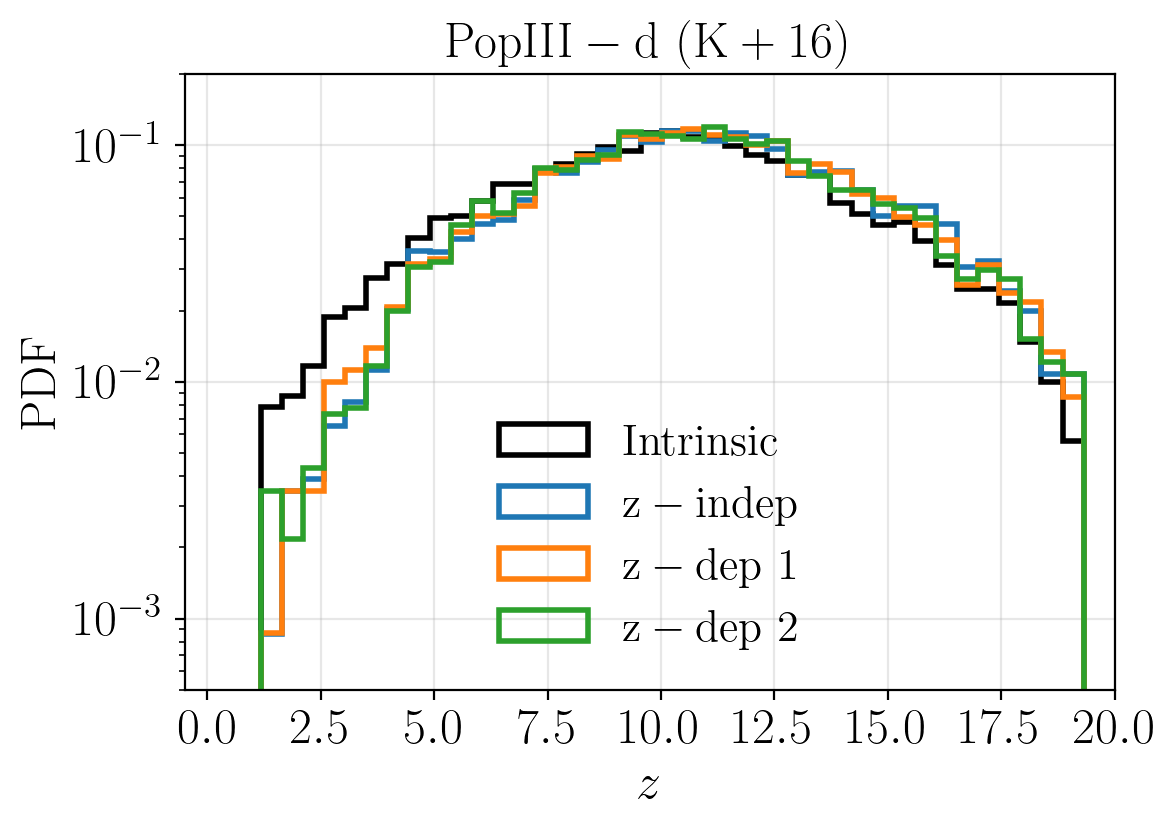

In [158]:
df  = pd.read_csv("SecondRun/PopIIId/popIII_SNRLb_final.csv", sep=",")
df1 = pd.read_csv("SecondRun/PopIIId/popIII_z_indep.csv", sep=",")
df2 = pd.read_csv("SecondRun/PopIIId/popIII_z_dep1.csv", sep=",")
df3 = pd.read_csv("SecondRun/PopIIId/popIII_z_dep2.csv", sep=",")

sigma_z = .55
for d in [df, df1, df2, df3]:
    d["z_merger_noisy"] = d["z_merger"] + np.random.normal(0, sigma_z, len(d))

z_bins = np.linspace(df1["z_merger"].min(), df1["z_merger"].max(), 40)

plt.figure(figsize=(6,4))

plt.hist(df["z_merger_noisy"], bins=z_bins, density=True, histtype='step', color='black', lw=2, label=r"$\mathrm{Intrinsic}$")
plt.hist(df1["z_merger_noisy"], bins=z_bins, density=True, histtype='step', color='tab:blue', lw=2, label=r"$\mathrm{z-indep}$")
plt.hist(df2["z_merger_noisy"], bins=z_bins, density=True, histtype='step', color='tab:orange', lw=2, label=r"$\mathrm{z-dep\ 1}$")
plt.hist(df3["z_merger_noisy"], bins=z_bins, density=True, histtype='step', color='tab:green', lw=2, label=r"$\mathrm{z-dep\ 2}$")

plt.yscale('log')
plt.xlim(-0.5, 20)
plt.ylim(5e-4, 2e-1)

plt.xticks(np.arange(0,21,2.5))
plt.xlabel(r"$z$", fontsize=18)
plt.tick_params(labelsize=18)
plt.ylabel(r"$\mathrm{PDF}$", fontsize=18)
plt.legend(frameon=False, fontsize=16)
plt.grid(alpha=0.3)
plt.title(r"$\mathrm{PopIII-d\ (K+16) }$", fontsize=18)
plt.savefig("SecondRun/Images/lensed_dist_popIII.pdf", dpi=300, bbox_inches="tight")
plt.show()

# Strong Lensing Rates

In [121]:
# Asignacion de parametro de impacto y calculo de magnificacion para todos los catalogos sampleados

files = [
    "SecondRun/PopIIId/popIII_z_indep.csv", "SecondRun/PopIIId/popIII_z_dep1.csv", "SecondRun/PopIIId/popIII_z_dep2.csv",
    "SecondRun/Q3d/Q3d_z_indep.csv", "SecondRun/Q3d/Q3d_z_dep1.csv", "SecondRun/Q3d/Q3d_z_dep2.csv", 
    "SecondRun/Q3nod/Q3nod_z_indep.csv", "SecondRun/Q3nod/Q3nod_z_dep1.csv", "SecondRun/Q3nod/Q3nod_z_dep2.csv",
    "SecondRun/HSnodnoSN/HSnodnoSN_z_indep.csv", "SecondRun/HSnodnoSN/HSnodnoSN_z_dep1.csv", "SecondRun/HSnodnoSN/HSnodnoSN_z_dep2.csv",
    "SecondRun/HSnodSN/HSnodSN_z_indep.csv", "SecondRun/HSnodSN/HSnodSN_z_dep1.csv", "SecondRun/HSnodSN/HSnodSN_z_dep2.csv",
    "SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_indep.csv", "SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_dep1.csv","SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_dep2.csv"
]

for file_path in files:
    df = pd.read_csv(file_path)

    df["x"] = np.random.rand(len(df))
    df["y"] = df["x"]**.5
    df["xp"] = df["y"] + 1
    df["xm"] = df["y"] - 1
    df["mup"] = 1 + (1/ df["y"]) 
    df["mum"] = 1 - (1/ df["y"]) 
    df["SNRp"] =  df["Mean_SNR"] * np.sqrt(np.abs(df["mup"]))
    df["SNRm"] =  df["Mean_SNR"] * np.sqrt(np.abs(df["mum"]))
    
    df.to_csv(file_path, index=False)

In [130]:
pop = 5.69
q3 = 0.18
q3nod = 2.42
hsnono = 180.80
hsno = 168.73
hsha = 40.74

print(5000/pop)
print(5000/q3)
print(5000/q3nod)
print(5000/hsnono)
print(5000/hsno)
print(5000/hsha)

878.7346221441124
27777.777777777777
2066.115702479339
27.654867256637168
29.633141705683638
122.72950417280313


In [131]:
files_with_norm = [
    ("SecondRun/PopIIId/popIII_z_indep.csv", 725.689404934688),
    ("SecondRun/PopIIId/popIII_z_dep1.csv", 1144.1647597254005),
    ("SecondRun/PopIIId/popIII_z_dep2.csv", 878.7346221441124),
    ("SecondRun/Q3d/Q3d_z_indep.csv", 26315.78947368421),
    ("SecondRun/Q3d/Q3d_z_dep1.csv", 38461.53846153846),
    ("SecondRun/Q3d/Q3d_z_dep2.csv", 27777.777777777777),
    ("SecondRun/Q3nod/Q3nod_z_indep.csv", 1724.1379310344828),
    ("SecondRun/Q3nod/Q3nod_z_dep1.csv", 2702.7027027027025),
    ("SecondRun/Q3nod/Q3nod_z_dep2.csv", 2066.115702479339),
    ("SecondRun/HSnodnoSN/HSnodnoSN_z_indep.csv", 21.618817018332756),
    ("SecondRun/HSnodnoSN/HSnodnoSN_z_dep1.csv", 35.02626970227671),
    ("SecondRun/HSnodnoSN/HSnodnoSN_z_dep2.csv", 27.654867256637168),
    ("SecondRun/HSnodSN/HSnodSN_z_indep.csv", 23.194322029967065),
    ("SecondRun/HSnodSN/HSnodSN_z_dep1.csv", 37.55445395823945),
    ("SecondRun/HSnodSN/HSnodSN_z_dep2.csv", 29.633141705683638),
    ("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_indep.csv", 97.75171065493646),
    ("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_dep1.csv", 156.88735487919672),
    ("SecondRun/HSnodSNhighaccr/HSnodSNhighaccr_z_dep2.csv", 122.72950417280313)
]

results = []

for file_path, norm in files_with_norm:
    df = pd.read_csv(file_path)

    cond1 = (df['SNRm'] < 8) & (df['SNRp'] > 8)
    cond2 = (df['SNRm'] > 8) & (df['SNRp'] > 8) 
    cond3 = (df['Mean_SNR'] < 8) & (df['SNRp'] > 8)

    n_cond1 = df[cond3].shape[0] / norm
    n_cond2 = df[cond2].shape[0] / norm
    n_cond3 = df[cond1].shape[0] / norm

    results.append({
        "archivo": file_path,
        "cond1": n_cond1,
        "cond2": n_cond2,
        "cond3": n_cond3
    })

    print(f"\nArchivo: {file_path}")
    print(f"Eventos cond1: {n_cond1:.3f}")
    print(f"Eventos cond2: {n_cond2:.3f}")
    print(f"Eventos cond3: {n_cond3:.3f}")

pd.DataFrame(results).to_csv("SecondRun/resumen_condiciones.csv", index=False)


Archivo: SecondRun/PopIIId/popIII_z_indep.csv
Eventos cond1: 1.695
Eventos cond2: 0.969
Eventos cond3: 1.830

Archivo: SecondRun/PopIIId/popIII_z_dep1.csv
Eventos cond1: 1.053
Eventos cond2: 0.619
Eventos cond3: 1.172

Archivo: SecondRun/PopIIId/popIII_z_dep2.csv
Eventos cond1: 1.454
Eventos cond2: 0.786
Eventos cond3: 1.613

Archivo: SecondRun/Q3d/Q3d_z_indep.csv
Eventos cond1: 0.000
Eventos cond2: 0.188
Eventos cond3: 0.001

Archivo: SecondRun/Q3d/Q3d_z_dep1.csv
Eventos cond1: 0.000
Eventos cond2: 0.129
Eventos cond3: 0.001

Archivo: SecondRun/Q3d/Q3d_z_dep2.csv
Eventos cond1: 0.000
Eventos cond2: 0.178
Eventos cond3: 0.001

Archivo: SecondRun/Q3nod/Q3nod_z_indep.csv
Eventos cond1: 0.012
Eventos cond2: 2.812
Eventos cond3: 0.081

Archivo: SecondRun/Q3nod/Q3nod_z_dep1.csv
Eventos cond1: 0.004
Eventos cond2: 1.802
Eventos cond3: 0.045

Archivo: SecondRun/Q3nod/Q3nod_z_dep2.csv
Eventos cond1: 0.008
Eventos cond2: 2.349
Eventos cond3: 0.065

Archivo: SecondRun/HSnodnoSN/HSnodnoSN_z_inde

# Time Delays

# Reproduccion Fig 1 Oguri2018, Fig 7 Torrey2015

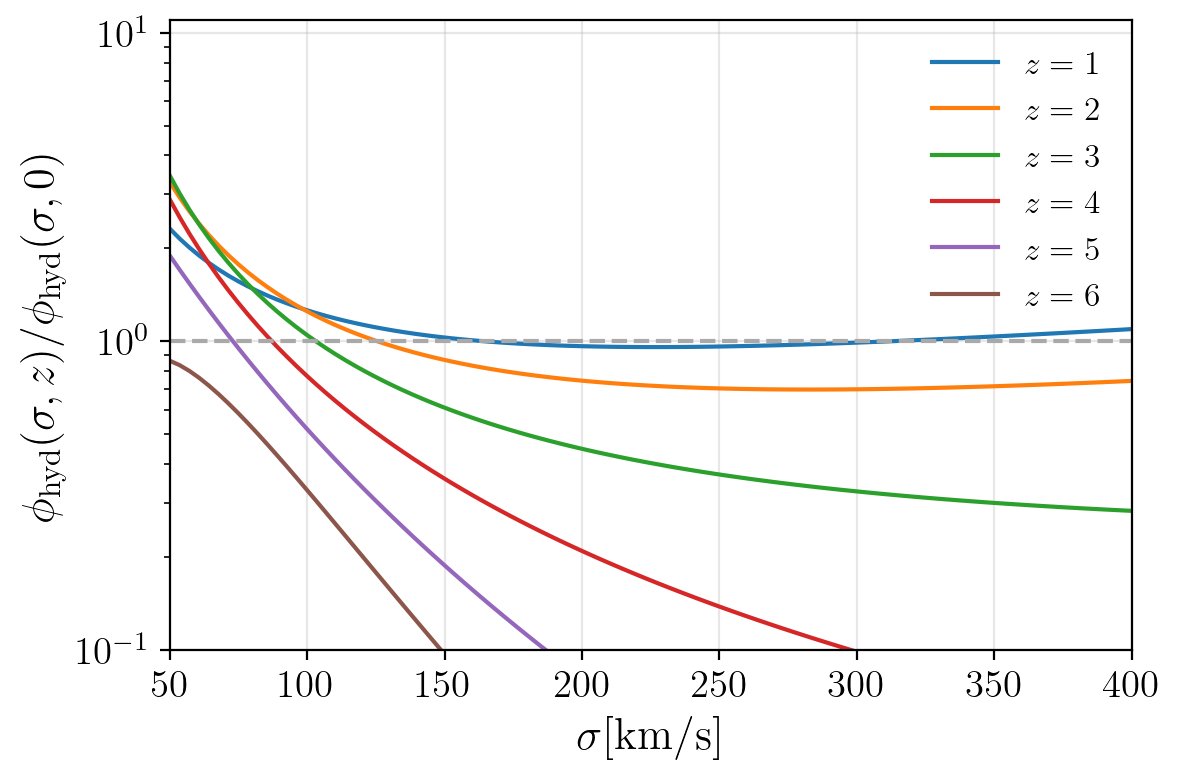

In [35]:
z_vals = np.array([ 0,1, 2, 3, 4, 5, 6])
sigma = np.linspace(50, 400, 100)

a0, a1, a2     = 7.391498     ,  5.729400     , -1.120552
al0, al1, al2  = -6.86339338  , -5.27327109   , 1.10411386
be0, be1, be2  = 2.85208259   , 1.25569600    , -0.28663846
ga0, ga1, ga2  = 0.06703215   , -0.04868317   , 0.00764841

def phi_hyd(z, sigma):
    A_hyd          = a0  + a1*z  + a2*z**2
    alpha_hyd      = al0 + al1*z + al2*z**2
    beta_hyd       = be0 + be1*z + be2*z**2
    gamma_hyd      = ga0 + ga1*z + ga2*z**2
    sigma_star_hyd = 10**gamma_hyd

    x = np.log10(sigma / sigma_star_hyd)
    
    n = 10**(A_hyd + alpha_hyd*x + beta_hyd*x**2 - np.exp(x))
    phi1 = n/sigma * (alpha_hyd + 2*beta_hyd*x - np.exp(x))
    return phi1

phi_hyd = {z: phi_hyd(z, sigma) for z in z_vals}

phi_hyd0 = phi_hyd[0]
N = {z: phi_hyd[z] / phi_hyd0 for z in z_vals}


plt.figure(figsize=(6,4))

for z in [1,2,3,4,5,6]:
    plt.plot(sigma, N[z], label=f"$z={z}$", linewidth=1.5 )
plt.axhline(1.0, ls="--", c="darkgrey", lw=1.5)
plt.xlabel(r"$\sigma \mathrm{ [km/s]}$", fontsize= 16)
plt.ylabel(r"$\phi_{\rm hyd}(\sigma, z)/\phi_{\rm hyd}(\sigma, 0)$", fontsize= 16)
plt.legend(fontsize= 12, frameon=False, loc='upper right')
plt.xlim(50, 400)
plt.ylim(0.1, 11)
plt.yscale('log')
plt.grid(True ,alpha=0.3)
plt.tick_params(labelsize = 14)
plt.tight_layout()

plt.savefig("SecondRun/Images/VDF_hydro_python.pdf", dpi=300)
plt.show()

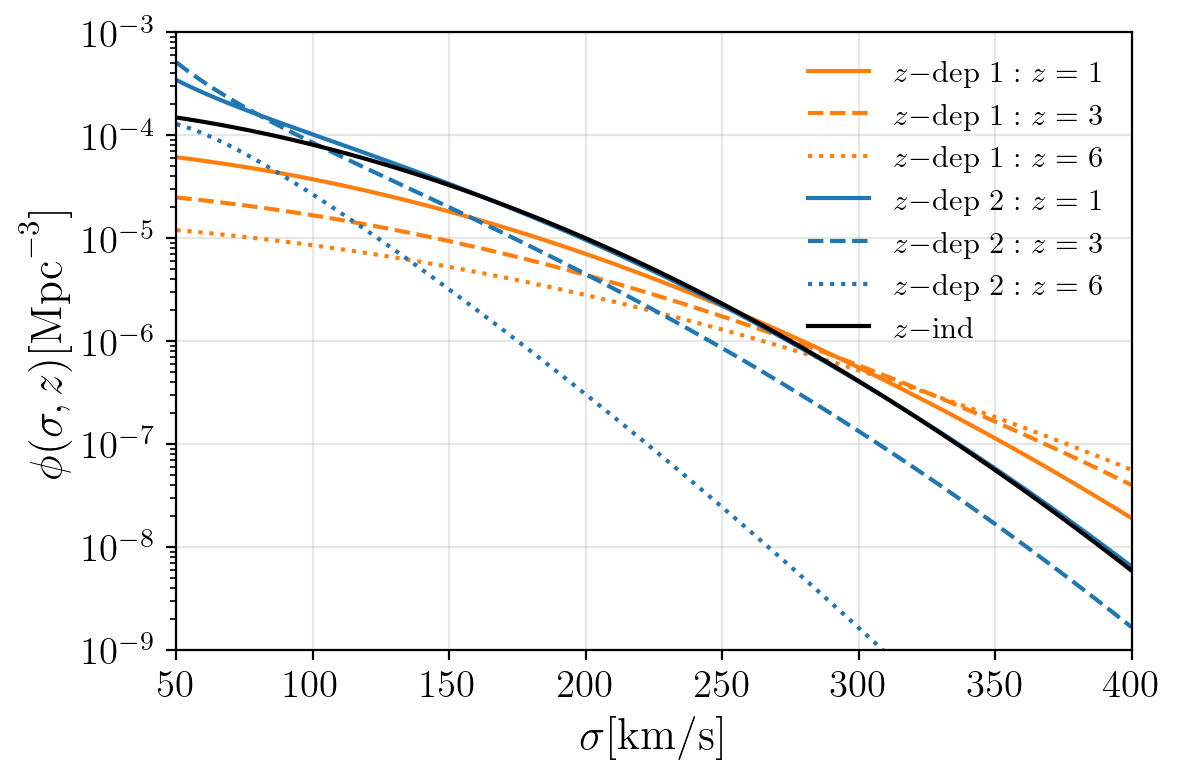

In [50]:
z_vals = np.array([1,3,6])
lines= ('-','--',':')

h = cosmo.h
H0 = cosmo.H0.value 
sigma = np.linspace(50, 400, 100)

phi_star0 = 2.099e-2 * (h/0.7)**3   # Mpc^-3
sigma_star0 = 113.78                 # km/s
alpha, beta = 0.94, 1.85
nu_n, nu_v = -1.18,0.18               
c_km_s = 3.0e5                      # km/s

# -- z-independent --
def phi_indep(sigma):    
    phi_indep = phi_star0*(sigma/sigma_star0)**alpha*np.exp(-(sigma/sigma_star0)**beta)*beta/(gamma(alpha/beta)*sigma)
    return phi_indep

# -- z-dependent1 --
def phi_dep1(sigma, z): 
    phi_dep1 = (phi_star0*(1+z)**nu_n)*(sigma/(sigma_star0*(1+z)**nu_v))**alpha*np.exp(-(sigma/(sigma_star0*(1+z)**nu_v))**beta)*beta/(gamma(alpha/beta)*sigma)
    return phi_dep1
    
# -- z-dependent2 --
def phi_dep2(sigma, z):
    a0, a1, a2   = 7.391498, 5.729400, -1.120552
    al0, al1, al2 = -6.863393, -5.273271, 1.104114
    be0, be1, be2 = 2.852083, 1.255696, -0.286638
    ga0, ga1, ga2 = 0.067032, -0.048683, 0.007648

    def phi_hyd(sigma, z):
        A_hyd     = a0  + a1*z  + a2*z**2
        alpha_hyd = al0 + al1*z + al2*z**2
        beta_hyd  = be0 + be1*z + be2*z**2
        gamma_hyd = ga0 + ga1*z + ga2*z**2
        sigma_star_hyd = 10**gamma_hyd

        x = np.log10(sigma / sigma_star_hyd)
        n = 10**(A_hyd + alpha_hyd*x + beta_hyd*x**2 - np.exp(x))

        phi1 = n/sigma * (alpha_hyd + 2*beta_hyd*x - np.exp(x))
        return phi1

    phi_z = phi_hyd(sigma, z)
    phi_0 = phi_hyd(sigma, 0.0)
    ratio = phi_z / phi_0

    return ratio * phi_indep(sigma)



plt.figure(figsize=(6,4))

for i,j in zip(z_vals, lines):
    plt.plot(sigma, phi_dep1(sigma, i), label = fr"$z\mathrm{{-dep\ 1:}}\ z={i}$", c = 'tab:orange', linestyle=j)
    
for i,j in zip(z_vals, lines):
    plt.plot(sigma, phi_dep2(sigma, i), label = fr"$z\mathrm{{-dep\ 2:}}\ z={i}$", c = 'tab:blue', linestyle=j)
    
plt.plot(sigma, phi_indep(sigma), label= r'$z\mathrm{-ind}$', c= 'k')    

plt.xlabel(r"$\sigma \mathrm{ [km/s]}$", fontsize= 16)
plt.ylabel(r"$\phi(\sigma, z)\mathrm{ [Mpc}^{-3}]$", fontsize= 16)
plt.xlim(50, 400)
plt.ylim(1e-9,1e-3)
plt.yscale('log')
plt.grid(True ,alpha=0.3)
plt.legend(fontsize= 11, frameon=False, loc='upper right')
plt.tick_params(labelsize = 14)
plt.tight_layout()
plt.savefig("SecondRun/Images/VDF_comparison_python.pdf", dpi=300)
plt.show()